# DE PROJECT NETW908
# Name - Mohamed Ahmed Abdelmaksoud
# ID - 43-16710
# Major - Networks

## Data extraction

In [1]:
import pandas as pd
import requests

In [148]:
api_key = 'pk_3bfb3d07357a4af9ae4163aaa3e95d5c' # put your own API key

In [8]:
stocks = ["NFLX","SCHW","CERN","CNP","CDAY","FB","ADI","BKR","CVX","DVN"]
# NFLX,SCHW,CERN,CNP,CDAY,FB,ADI,BKR,CVX,DVN
url_batch = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=chart&range=Q42019&token={api_key}'
batch = requests.get(url_batch).json()

In [9]:
type(batch)

dict

In [10]:
len(batch)

10

In [11]:
batch.keys()

dict_keys(['NFLX', 'SCHW', 'CERN', 'CNP', 'CDAY', 'FB', 'ADI', 'BKR', 'CVX', 'DVN'])

In [12]:
batch

{'NFLX': {'chart': [{'close': 269.58,
    'high': 272.2,
    'low': 264.03,
    'open': 267.35,
    'symbol': 'NFLX',
    'volume': 8786284,
    'id': 'HISTORICAL_PRICES',
    'key': 'NFLX',
    'subkey': '',
    'date': '2019-10-01',
    'updated': 1606830572000,
    'changeOverTime': 0,
    'marketChangeOverTime': 0,
    'uOpen': 267.35,
    'uClose': 269.58,
    'uHigh': 272.2,
    'uLow': 264.03,
    'uVolume': 8786284,
    'fOpen': 267.35,
    'fClose': 269.58,
    'fHigh': 272.2,
    'fLow': 264.03,
    'fVolume': 8786284,
    'label': 'Oct 1, 19',
    'change': 0,
    'changePercent': 0},
   {'close': 268.03,
    'high': 269.35,
    'low': 262.19,
    'open': 263.61,
    'symbol': 'NFLX',
    'volume': 7773299,
    'id': 'HISTORICAL_PRICES',
    'key': 'NFLX',
    'subkey': '',
    'date': '2019-10-02',
    'updated': 1606830572000,
    'changeOverTime': -0.005749684694710332,
    'marketChangeOverTime': -0.005749684694710332,
    'uOpen': 263.61,
    'uClose': 268.03,
    'uHig

In [13]:
dict_batch = {'symbol':[],'open':[],'close':[],'high':[],'low':[],'volume':[],'changePercent':[],'date':[]}
#symbol,open,close,high,low,volume,change percent,date,company name and sector

In [14]:
# we first access each symbol by accessing the keys in the data recieved
for symbol in batch.keys():
    # we then loop over each element in the chart of the symbol and plug in the data into the dictionary
    for row in batch[symbol]['chart']:
        dict_batch['symbol'].append(row['symbol'])
        dict_batch['open'].append(row['open'])
        dict_batch['close'].append(row['close'])
        dict_batch['high'].append(row['high'])
        dict_batch['low'].append(row['low'])
        dict_batch['volume'].append(row['volume'])
        dict_batch['changePercent'].append(row['changePercent'])
        dict_batch['date'].append(row['date'])
        

In [15]:
df_batch = pd.DataFrame(dict_batch)

In [16]:
df_batch['symbol'].nunique()

10

In [17]:
df_batch.head()

,symbol,open,close,high,low,volume,changePercent,date
0,NFLX,267.35,269.58,272.2000,264.03,8786284,0.0000,2019-10-01
1,NFLX,263.61,268.03,269.3500,262.19,7773299,-0.0057,2019-10-02
2,NFLX,267.78,268.15,268.8430,257.01,9068810,0.0004,2019-10-03
3,NFLX,268.20,272.79,275.4846,266.47,9992774,0.0173,2019-10-04
4,NFLX,271.99,274.46,276.6800,271.28,6796811,0.0061,2019-10-07


In [18]:
url_company = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=company&token={api_key}'
company_info = requests.get(url_company).json()

In [19]:
type(company_info),company_info.keys()

(dict,
 dict_keys(['NFLX', 'SCHW', 'CERN', 'CNP', 'CDAY', 'FB', 'ADI', 'BKR', 'CVX', 'DVN']))

In [20]:
company_info

{'NFLX': {'company': {'symbol': 'NFLX',
   'companyName': 'NetFlix Inc',
   'exchange': 'NASDAQ',
   'industry': 'Internet Publishing and Broadcasting and Web Search Portals',
   'website': 'www.netflix.com',
   'description': "Netflix is the world's leading streaming entertainment service with over 195 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.",
   'CEO': 'Reed Hastings',
   'securityName': 'NetFlix Inc',
   'issueType': 'cs',
   'sector': 'Information',
   'primarySicCode': 7841,
   'employees': 9400,
   'tags': ['Consumer Services', 'Cable/Satellite TV'],
   'address': '100 Winchester Cir',
   'address2': None,
   'state': 'California',
   'city': 'Los Gatos',
   'zip': '95032-1815',
   'country': 'US',
  

In [21]:
info = {'companyName':[],'sector':[],'symbol':[]}

In [22]:
# we access each symbol by accessing the keys in the data recieved
for symbol in company_info.keys():
    info['companyName'].append(company_info[symbol]['company']['companyName'])
    info['sector'].append(company_info[symbol]['company']['sector'])
    info['symbol'].append(company_info[symbol]['company']['symbol'])
    

In [23]:
info

{'companyName': ['NetFlix Inc',
  'Charles Schwab Corp.',
  'Cerner Corp.',
  'Centerpoint Energy Inc.',
  'Ceridian HCM Holding Inc.',
  'Meta Platforms Inc',
  'Analog Devices Inc.',
  'Baker Hughes Co',
  'Chevron Corp.',
  'Devon Energy Corp.'],
 'sector': ['Information',
  'Finance and Insurance',
  'Professional, Scientific, and Technical Services',
  'Utilities',
  'Professional, Scientific, and Technical Services',
  'Information',
  'Manufacturing',
  'Manufacturing',
  'Manufacturing',
  'Mining, Quarrying, and Oil and Gas Extraction'],
 'symbol': ['NFLX',
  'SCHW',
  'CERN',
  'CNP',
  'CDAY',
  'FB',
  'ADI',
  'BKR',
  'CVX',
  'DVN']}

In [421]:
comps = pd.DataFrame(info)

In [422]:
comps.head()

,companyName,sector,symbol
0,NetFlix Inc,Information,NFLX
1,Charles Schwab Corp.,Finance and Insurance,SCHW
2,Cerner Corp.,"Professional, Scientific, and Technical Services",CERN
3,Centerpoint Energy Inc.,Utilities,CNP
4,Ceridian HCM Holding Inc.,"Professional, Scientific, and Technical Services",CDAY


In [449]:
df = pd.merge(df_batch,comps,on=['symbol'])

In [450]:
df.to_csv('project.csv', index=False)
# the reason behind storing the data into csv file and reading it again in the comming lines, is that we have 
# a limited number of calls in the IEX cloud. When I need to rerun the code I only have to read the csv file, 
# instead of extracting the whole data and consuming calls


### First and last 5 rows and general info about the dataframe
# =======================================
# =======================================
# =======================================

In [ ]:
# Run from here

In [2]:
import pandas as pd
import requests

In [3]:
data = pd.read_csv('project.csv')
data.head(1)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,NFLX,267.35,269.58,272.2,264.03,8786284,0.0,2019-10-01,NetFlix Inc,Information


In [4]:
data.tail(1)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
639,DVN,25.28,25.97,26.08,25.15,3392020,0.0172,2019-12-31,Devon Energy Corp.,"Mining, Quarrying, and Oil and Gas Extraction"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         640 non-null    object 
 1   open           640 non-null    float64
 2   close          640 non-null    float64
 3   high           640 non-null    float64
 4   low            640 non-null    float64
 5   volume         640 non-null    int64  
 6   changePercent  640 non-null    float64
 7   date           640 non-null    object 
 8   companyName    640 non-null    object 
 9   sector         640 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 50.1+ KB


In [5]:
data.describe()

,open,close,high,low,volume,changePercent
count,640.000000,640.000000,640.000000,640.000000,6.400000e+02,640.000000
mean,96.060758,96.157719,97.107004,95.047752,5.937770e+06,0.002081
std,84.515196,84.693058,85.544500,83.545758,5.417090e+06,0.017320
min,19.780000,19.800000,20.390000,19.720000,2.516400e+05,-0.071400
25%,27.855000,27.592500,28.137500,27.366250,2.314098e+06,-0.006050
50%,66.450000,66.450000,66.975000,65.730000,4.681512e+06,0.001400
75%,118.830000,118.640000,119.462500,117.870000,7.519484e+06,0.011800
max,337.760000,336.900000,338.000000,332.010000,4.283438e+07,0.102100


## Data cleaning

In [6]:
# 1. Data cleaning
# All prices should be rounded to 2 decimal places and the change percent feature should be
# presented as a percentage and rounded to 2 decimal places as well.

In [6]:
data['open']=round(data['open'],2)
data['close']=round(data['close'],2)
data['high']=round(data['high'],2)
data['low']=round(data['low'],2)

In [7]:
data['changePercent']=round(data['changePercent'],2)
data['changePercent']=data['changePercent']*100

In [8]:
data.head(1)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,NFLX,267.35,269.58,272.2,264.03,8786284,0.0,2019-10-01,NetFlix Inc,Information


## Correlation co-efficent

In [9]:
# 2. Understand relationships of your data’s features:
# The first step in this project would be to understand the relationships between the features of
# your data. For each stock,Calculate the correlation coefficient between each numeric feature
# and the close price.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# for one hot encoding and label encode with sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
labelencoder = preprocessing.LabelEncoder()
import datetime
from matplotlib.cbook import boxplot_stats

In [10]:
numeric_list=data.dtypes[data.dtypes!=np.object_].index


In [11]:
my_stocks=data['symbol'].unique()

In [12]:
correlation={}
# data[data["symbol"]==symbol][feature]
for stock in my_stocks:
    for feature in numeric_list:
        str_index=stock+' ==> '+feature+' & '+'close'
        correlation[str_index]= data[data["symbol"]==stock][feature].corr(data[data["symbol"]==stock]['close'])

In [13]:
# correlation

### Findings and conclusions - 
All the prices are correlated to the close price, but the volume and changePercent does not. We can conclude that the more the volume is the lower close price


## Variable transformation

In [14]:
# 3. Variable Transformation
# Variables in the dataset have several types, some of which can be easily handled by linear
# models while others not, like for example categorical variables or date/time variables. Thus,
# while exploring your dataset you need to identify variables of these types and transform them
# into numerical variables. Please note that no more than 20 additional columns should be
# created.

In [15]:
len(data.columns)

10

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(
#     data,  # predictors
#     data['changePercent'],  # target
#     test_size=0.3,  # percentage of obs in test set
#     random_state=0)  # seed to ensure reproducibility
# X_train.shape,X_test.shape,data.shape

In [17]:
# encoder = OneHotEncoder(categories='auto',
#                        drop='first', 
#                        sparse=False,
#                        handle_unknown='error')
# encoder.fit(X_train[non_numeric_list])
# tmp = encoder.transform(X_train[non_numeric_list])
# tmp = pd.DataFrame(tmp)
# tmp.columns = encoder.get_feature_names()
# tmp.head()
data['date']=pd.to_datetime(data['date'])
data2=pd.get_dummies(data, drop_first=True)

In [18]:
len(data2.columns)

30

In [19]:
data2.columns

Index(['open', 'close', 'high', 'low', 'volume', 'changePercent', 'date',
       'symbol_BKR', 'symbol_CDAY', 'symbol_CERN', 'symbol_CNP', 'symbol_CVX',
       'symbol_DVN', 'symbol_FB', 'symbol_NFLX', 'symbol_SCHW',
       'companyName_Baker Hughes Co', 'companyName_Centerpoint Energy Inc.',
       'companyName_Ceridian HCM Holding Inc.', 'companyName_Cerner Corp.',
       'companyName_Charles Schwab Corp.', 'companyName_Chevron Corp.',
       'companyName_Devon Energy Corp.', 'companyName_Meta Platforms Inc',
       'companyName_NetFlix Inc', 'sector_Information', 'sector_Manufacturing',
       'sector_Mining, Quarrying, and Oil and Gas Extraction',
       'sector_Professional, Scientific, and Technical Services',
       'sector_Utilities'],
      dtype='object')

In [20]:
data2.head(1)

,open,close,high,low,volume,changePercent,date,symbol_BKR,symbol_CDAY,symbol_CERN,...,companyName_Charles Schwab Corp.,companyName_Chevron Corp.,companyName_Devon Energy Corp.,companyName_Meta Platforms Inc,companyName_NetFlix Inc,sector_Information,sector_Manufacturing,"sector_Mining, Quarrying, and Oil and Gas Extraction","sector_Professional, Scientific, and Technical Services",sector_Utilities
0,267.35,269.58,272.2,264.03,8786284,0.0,2019-10-01,0,0,0,...,0,0,0,0,1,1,0,0,0,0


### Findings and conclusions -
-All non numerical variables except the date is encoded (OHE), this results in transforming all of the variables into numerical


## Date Discretization

In [21]:
import calendar
import datetime
from datetime import  datetime, timedelta

In [22]:
range_list=[]
def get_range(calendar_week):
    for week in calendar_week:
        monday = datetime.strptime(f'{2019}-{week}-1', "%Y-%W-%w")
        sunday=monday + timedelta(days=6.9)
#         print(type(sunday))
        mini_list=[monday,sunday]
        range_list.append(mini_list)
    return range_list

In [23]:
def get_range2(dataFrame):
    bins_date = pd.date_range(start= '2019-10-01', end='2019-12-31' ,freq='7D')
    bins_string = bins_date.astype(str).values

    range_ = ['{} ==> {}'.format(bins_string[i-1], bins_string[i]) for i in range(1, len(bins_string))]
    weeks_number =[ str(i) for i in range(1, len(range_)+1)]

    dataFrame['weeks_number'] = pd.cut(dataFrame['date'],
                   bins=bins_date,
                   labels=weeks_number,
                   include_lowest=True)

    dataFrame['Range'] = pd.cut(dataFrame['date'],
                   bins=bins_date,
                   labels=range_,
                   include_lowest=True)
    return dataFrame


In [24]:
# data['week_number']=data['date'].dt.strftime('%U')

In [25]:
# data['week_range']=get_range(data['week_number'])

In [26]:
# data['week_number'].nunique()

In [27]:
data2=get_range2(data2)

In [28]:
data2['weeks_number'].nunique()

13

In [30]:
data['weeks_number']=data2['weeks_number']
data['Range']=data2['Range']

In [29]:
data2.head(1)

,open,close,high,low,volume,changePercent,date,symbol_BKR,symbol_CDAY,symbol_CERN,...,companyName_Devon Energy Corp.,companyName_Meta Platforms Inc,companyName_NetFlix Inc,sector_Information,sector_Manufacturing,"sector_Mining, Quarrying, and Oil and Gas Extraction","sector_Professional, Scientific, and Technical Services",sector_Utilities,weeks_number,Range
0,267.35,269.58,272.2,264.03,8786284,0.0,2019-10-01,0,0,0,...,0,0,1,1,0,0,0,0,1,2019-10-01 ==> 2019-10-08


### Findings and conclusions- what is the cardinality of weeks(how many weeks is there)
-The caridnality =13, this means we have 13 weeks in this quarter

## Detecting outliers

In [30]:
# 5. Detecting Outliers
# A common way of identifying whether outliers are present in the dataset is using boxplot, which
# shows any outliers as black dots available below the 25th quartile or above the 75th quartile. Use
# this method to detect the presence of any outliers of each stock in any variable in the dataset.
numeric_list.to_list
# numeric_list2=['open', 'close', 'high', 'low', 'changePercent']

<bound method IndexOpsMixin.tolist of Index(['open', 'close', 'high', 'low', 'volume', 'changePercent'], dtype='object')>

In [31]:
def cm_to_inch(value):
    return value/2.54

In [32]:
def outlier_(data , symbol):
    fig2,pos =  plt.subplots(2,3,figsize=(30,30))
    x = np.arange(1,8)
    pos[0][0].boxplot(data[data["symbol"]==symbol]['open'])
    pos[0][0].set_title(f'{symbol} open col')
    pos[0][1].boxplot(data[data["symbol"]==symbol]['close'])
    pos[0][1].set_title(f'{symbol} close col')
    pos[0][2].boxplot(data[data["symbol"]==symbol]['high'])
    pos[0][2].set_title(f'{symbol} high col')
    pos[1][0].boxplot(data[data["symbol"]==symbol]['low'])
    pos[1][0].set_title(f'{symbol} low col')
    pos[1][1].boxplot(data[data["symbol"]==symbol]['volume'])
    pos[1][1].set_title(f'{symbol} volume col')
    pos[1][2].boxplot(data[data["symbol"]==symbol]['changePercent'])
    pos[1][2].set_title(f'{symbol} changePercent col')
    plt.show()

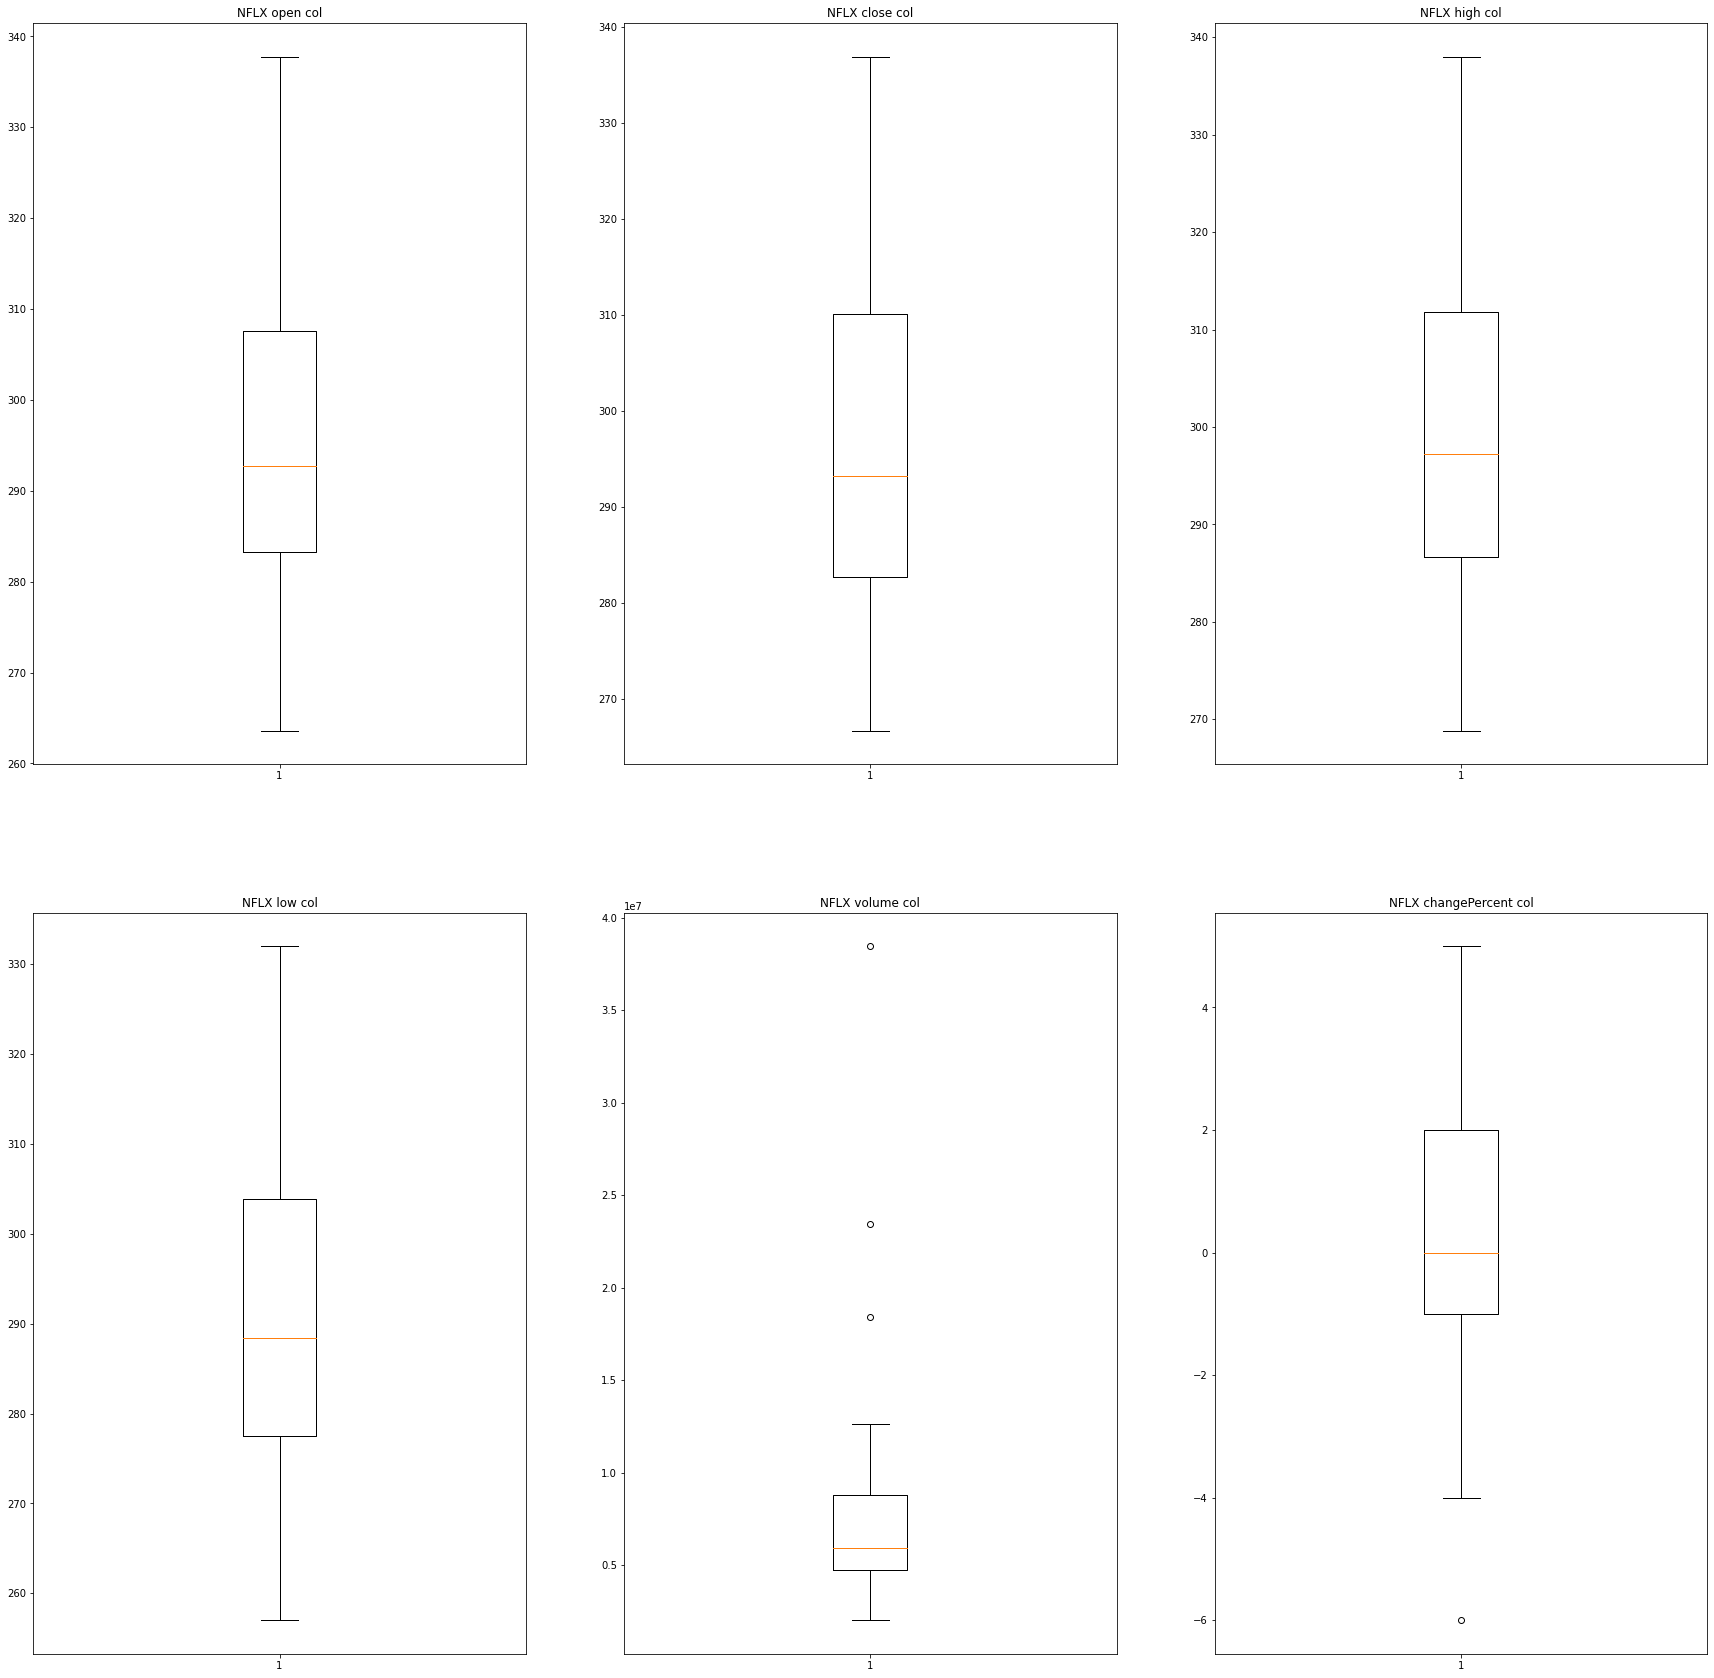

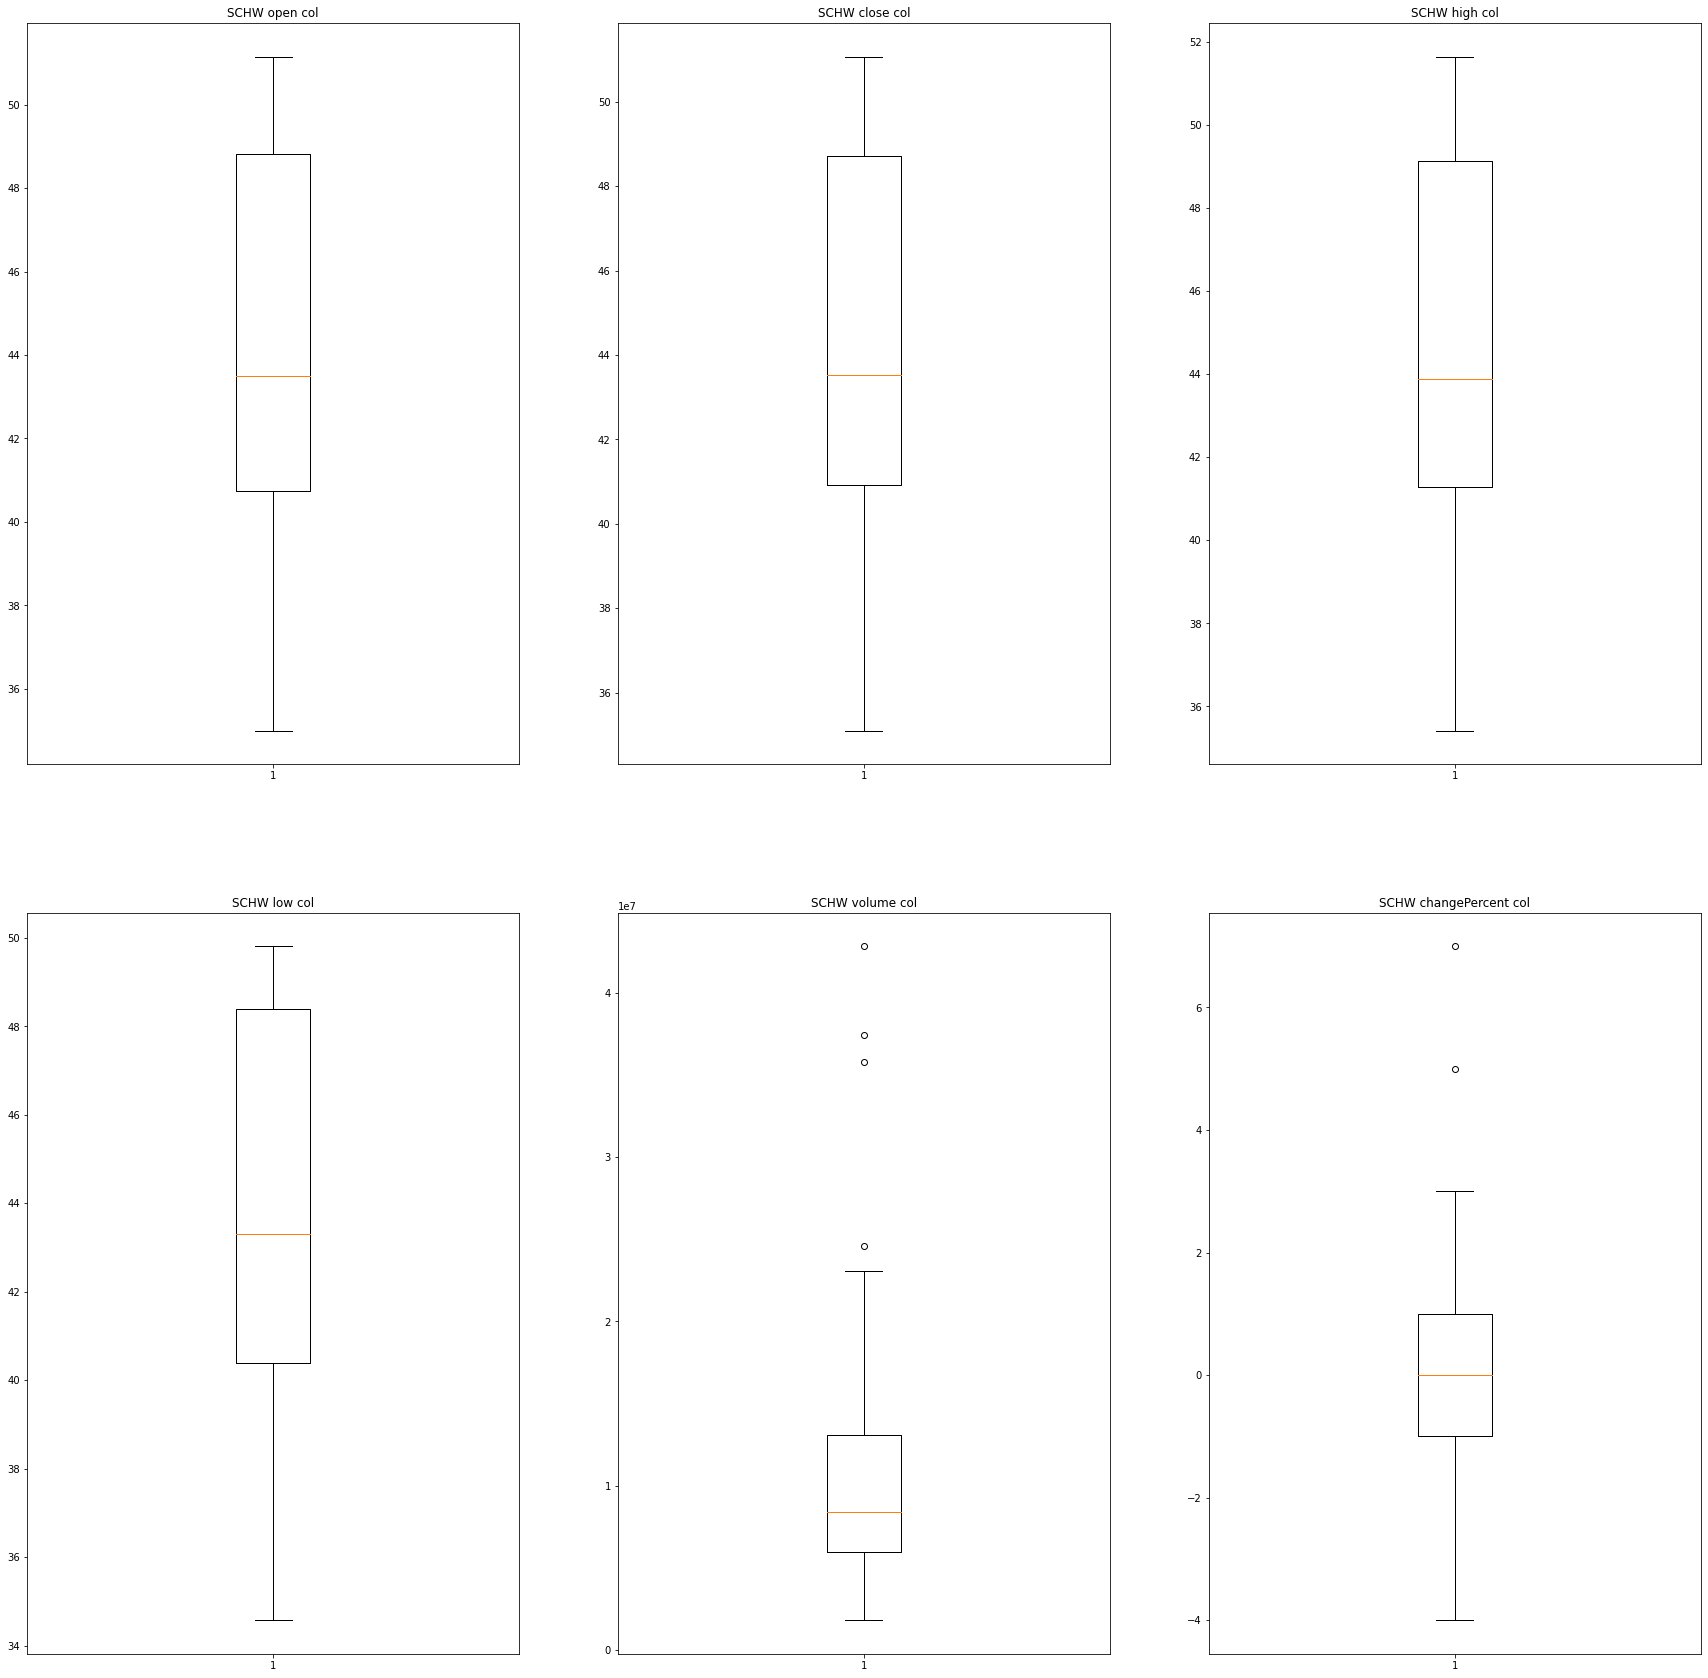

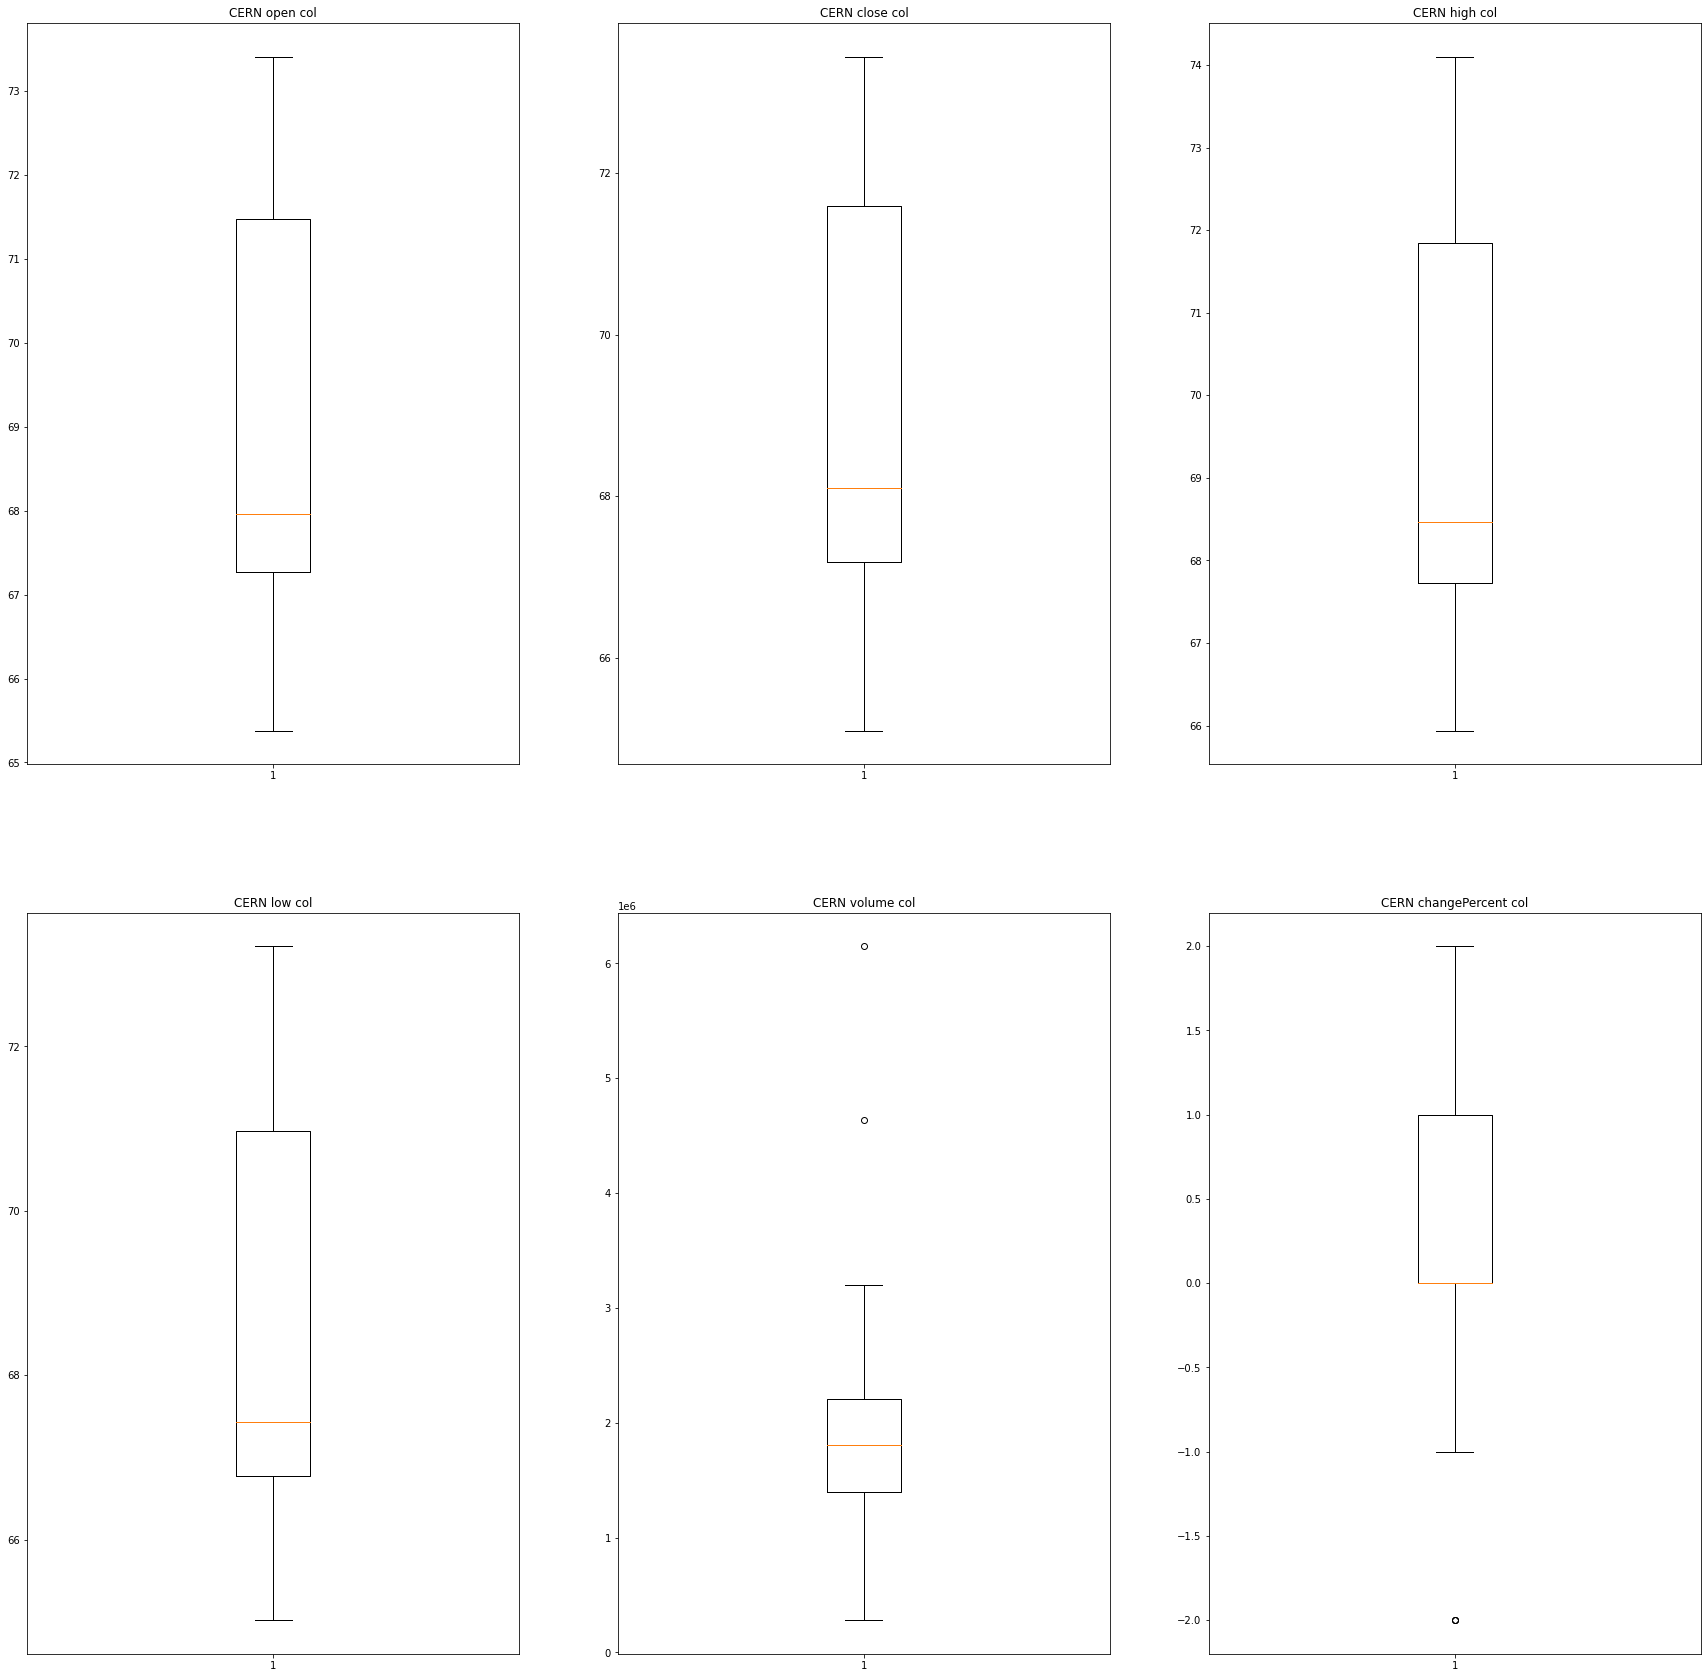

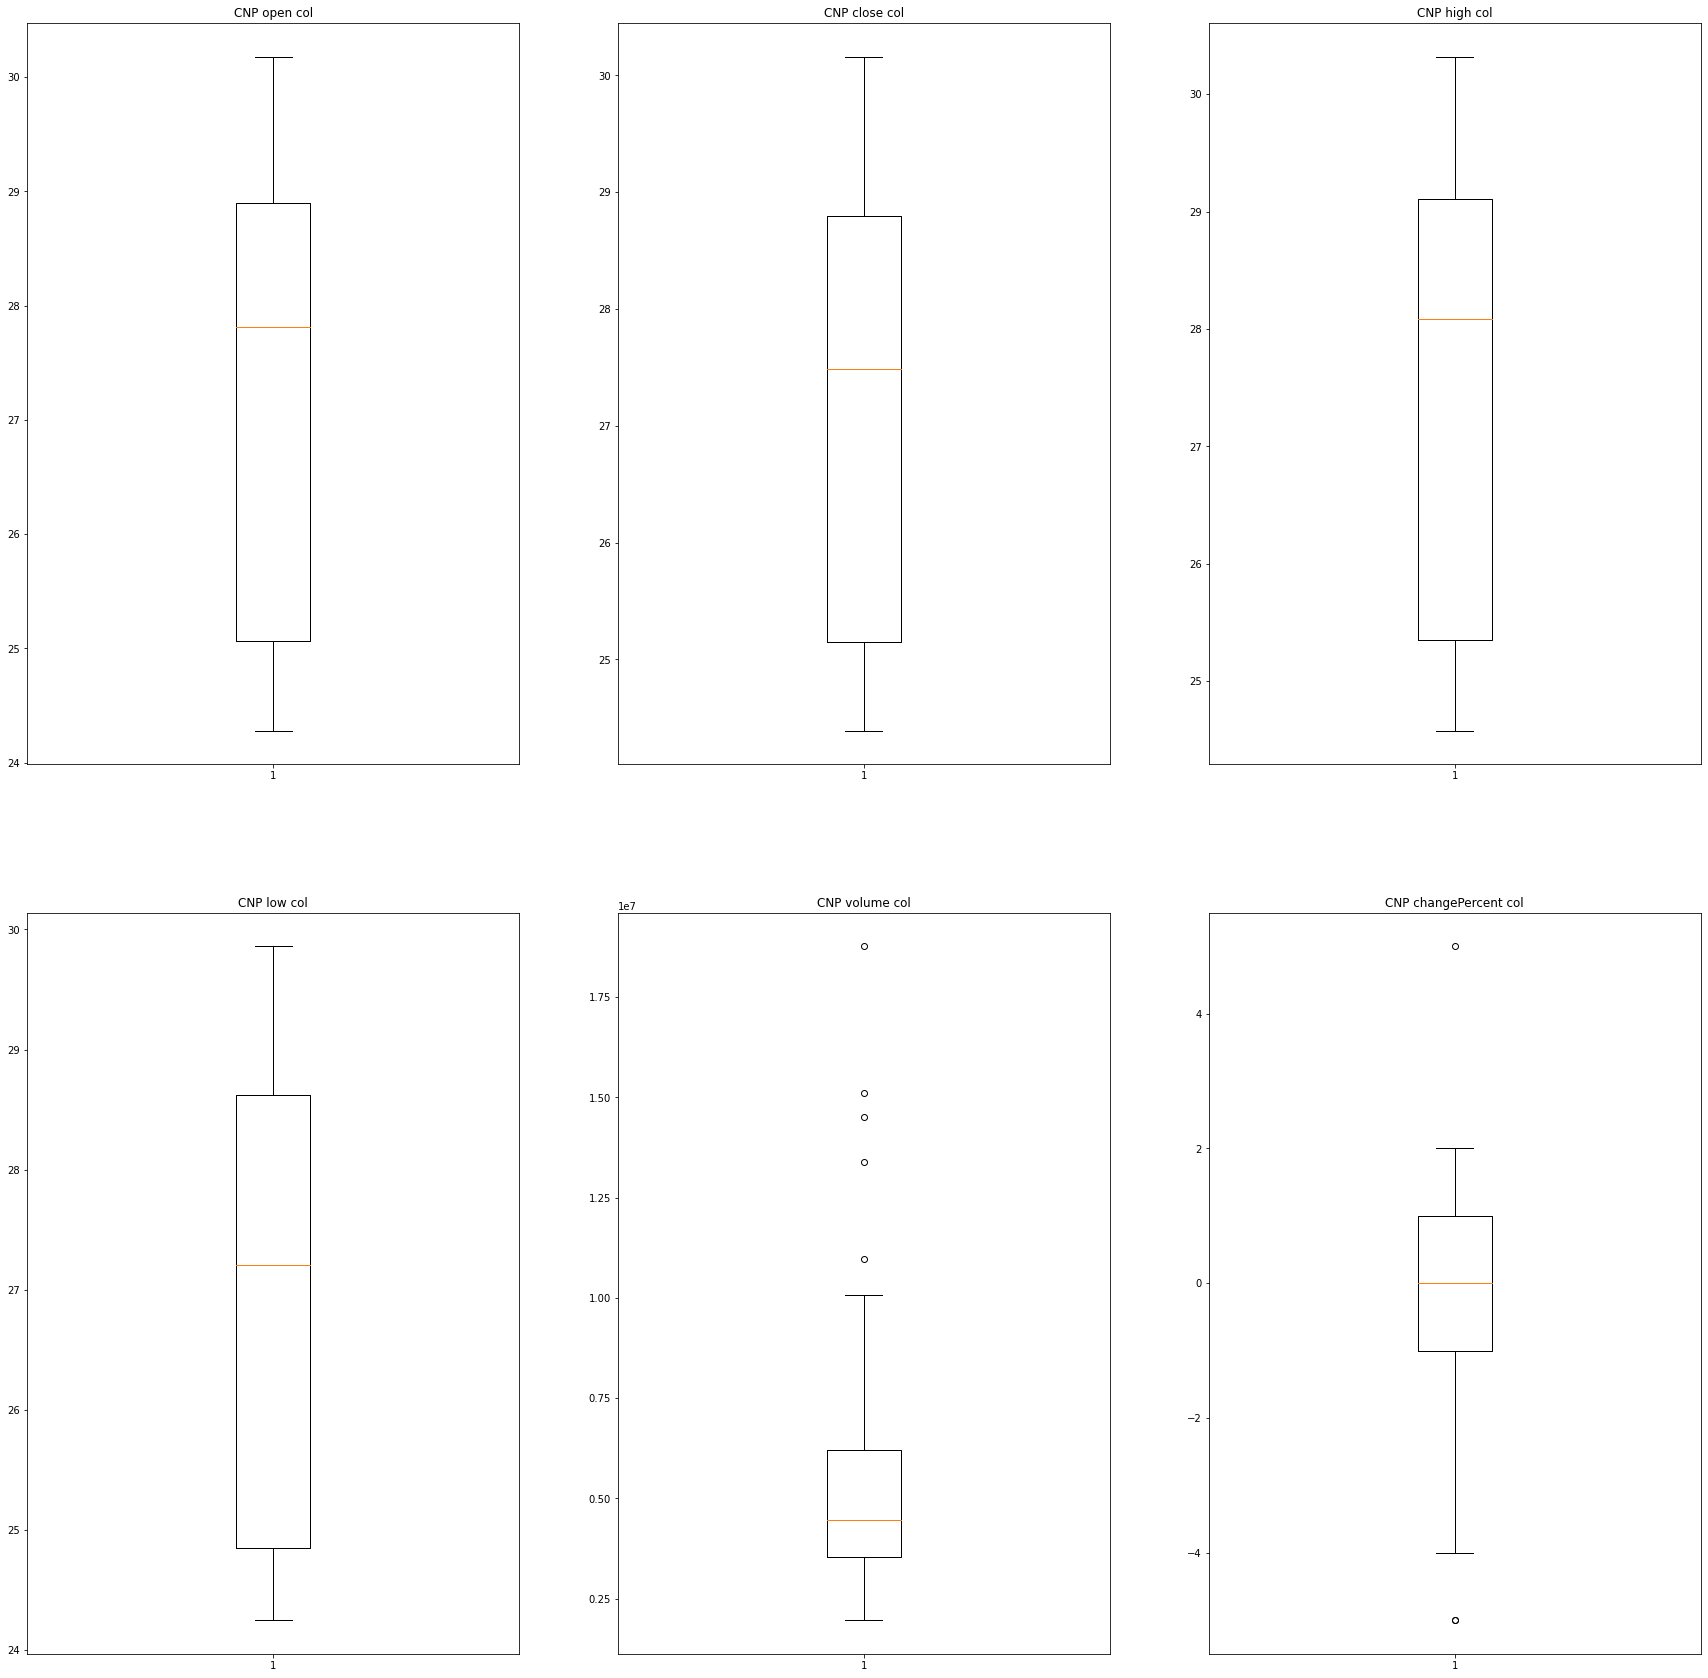

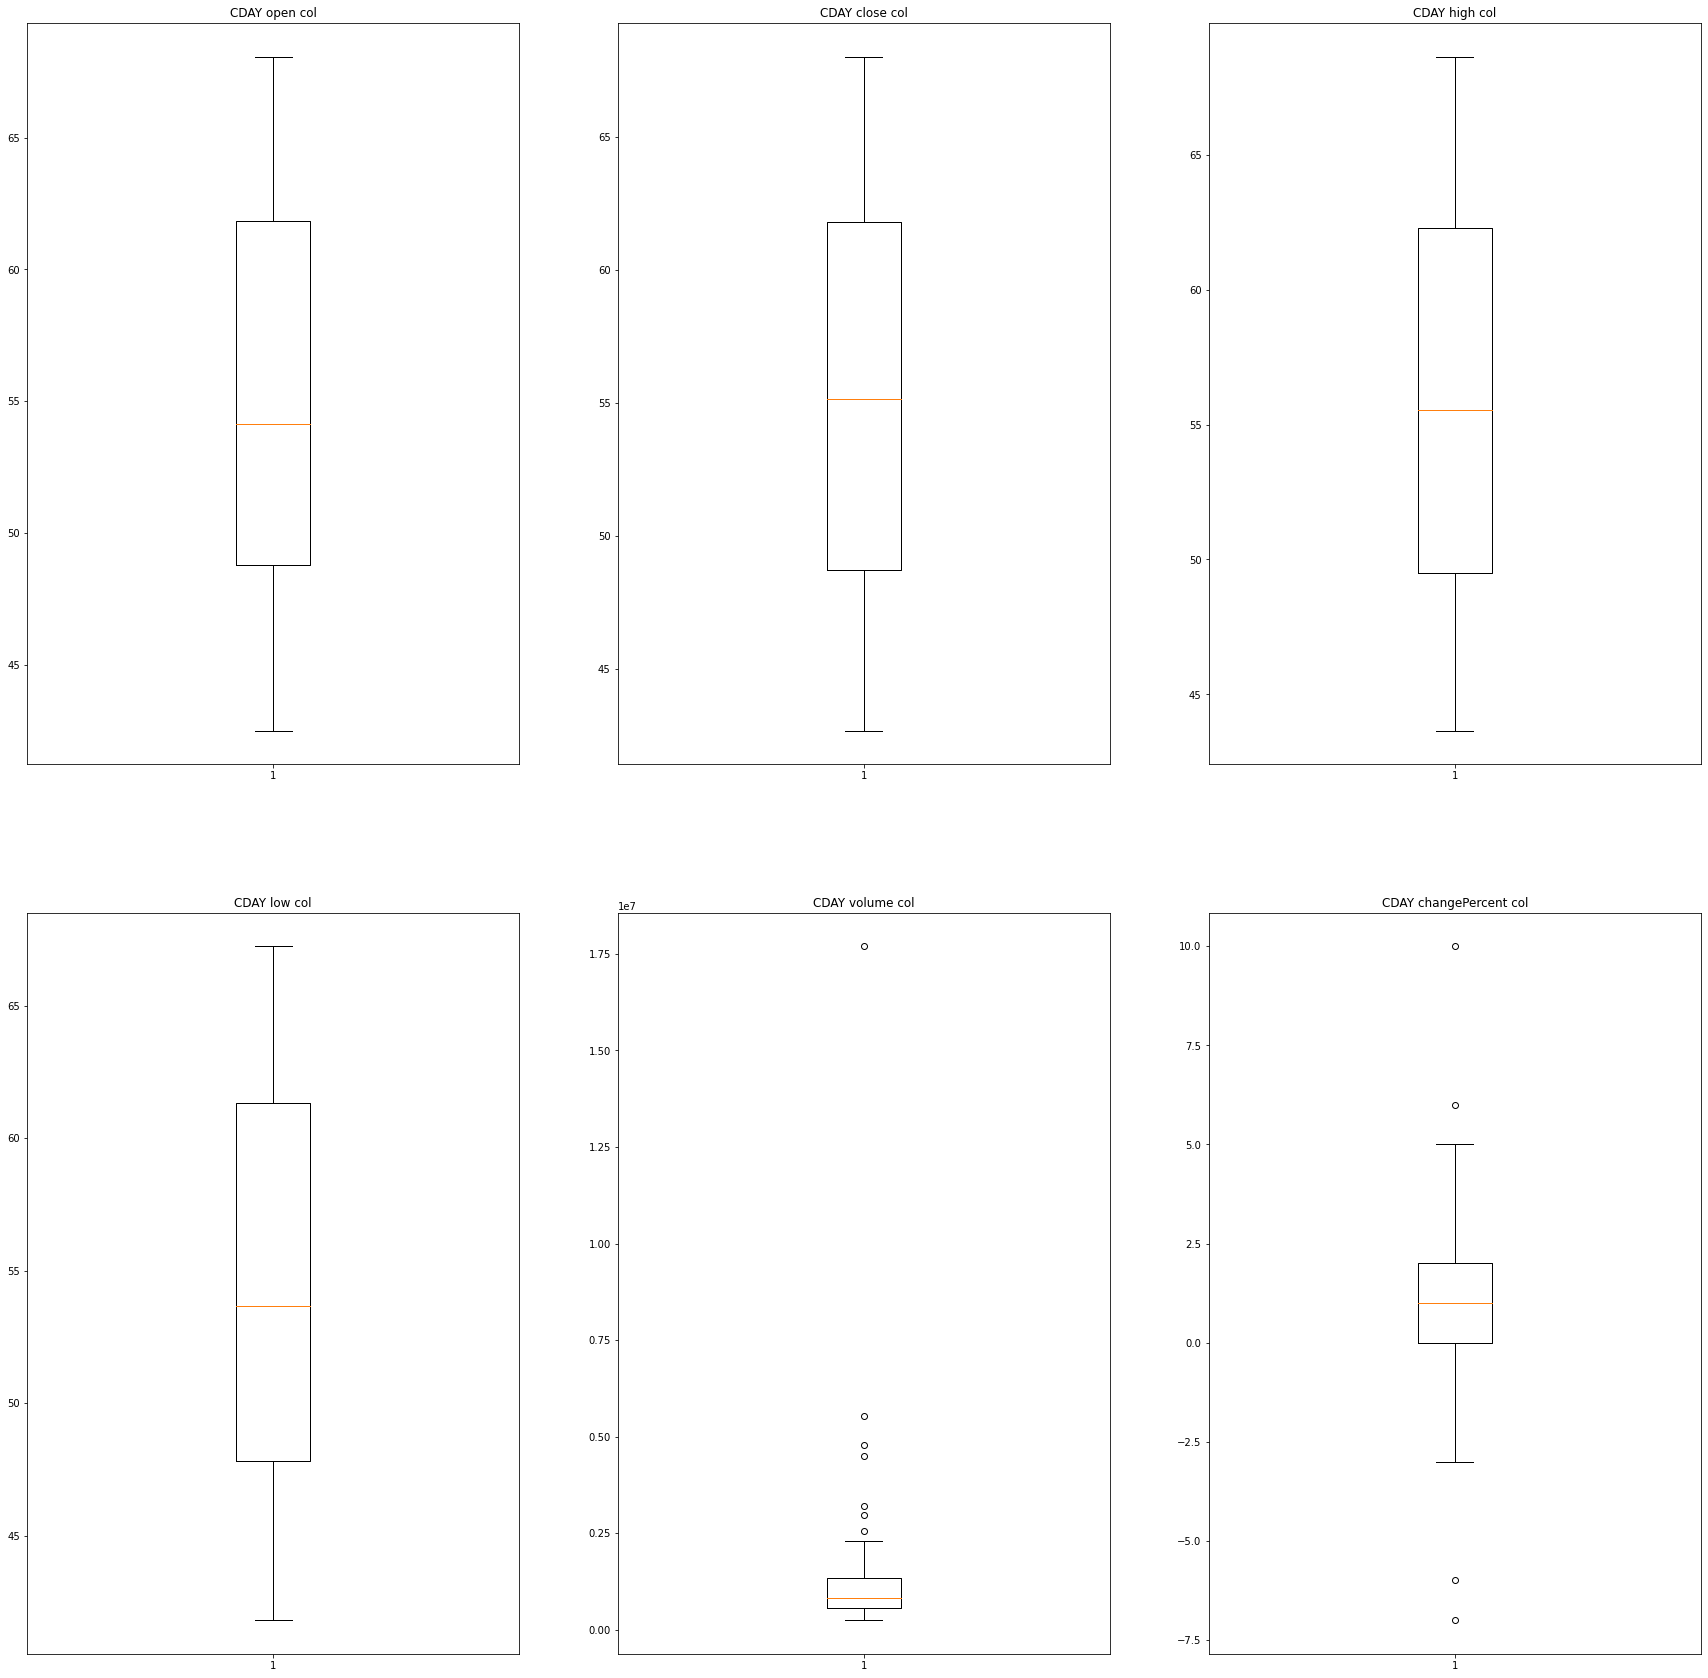

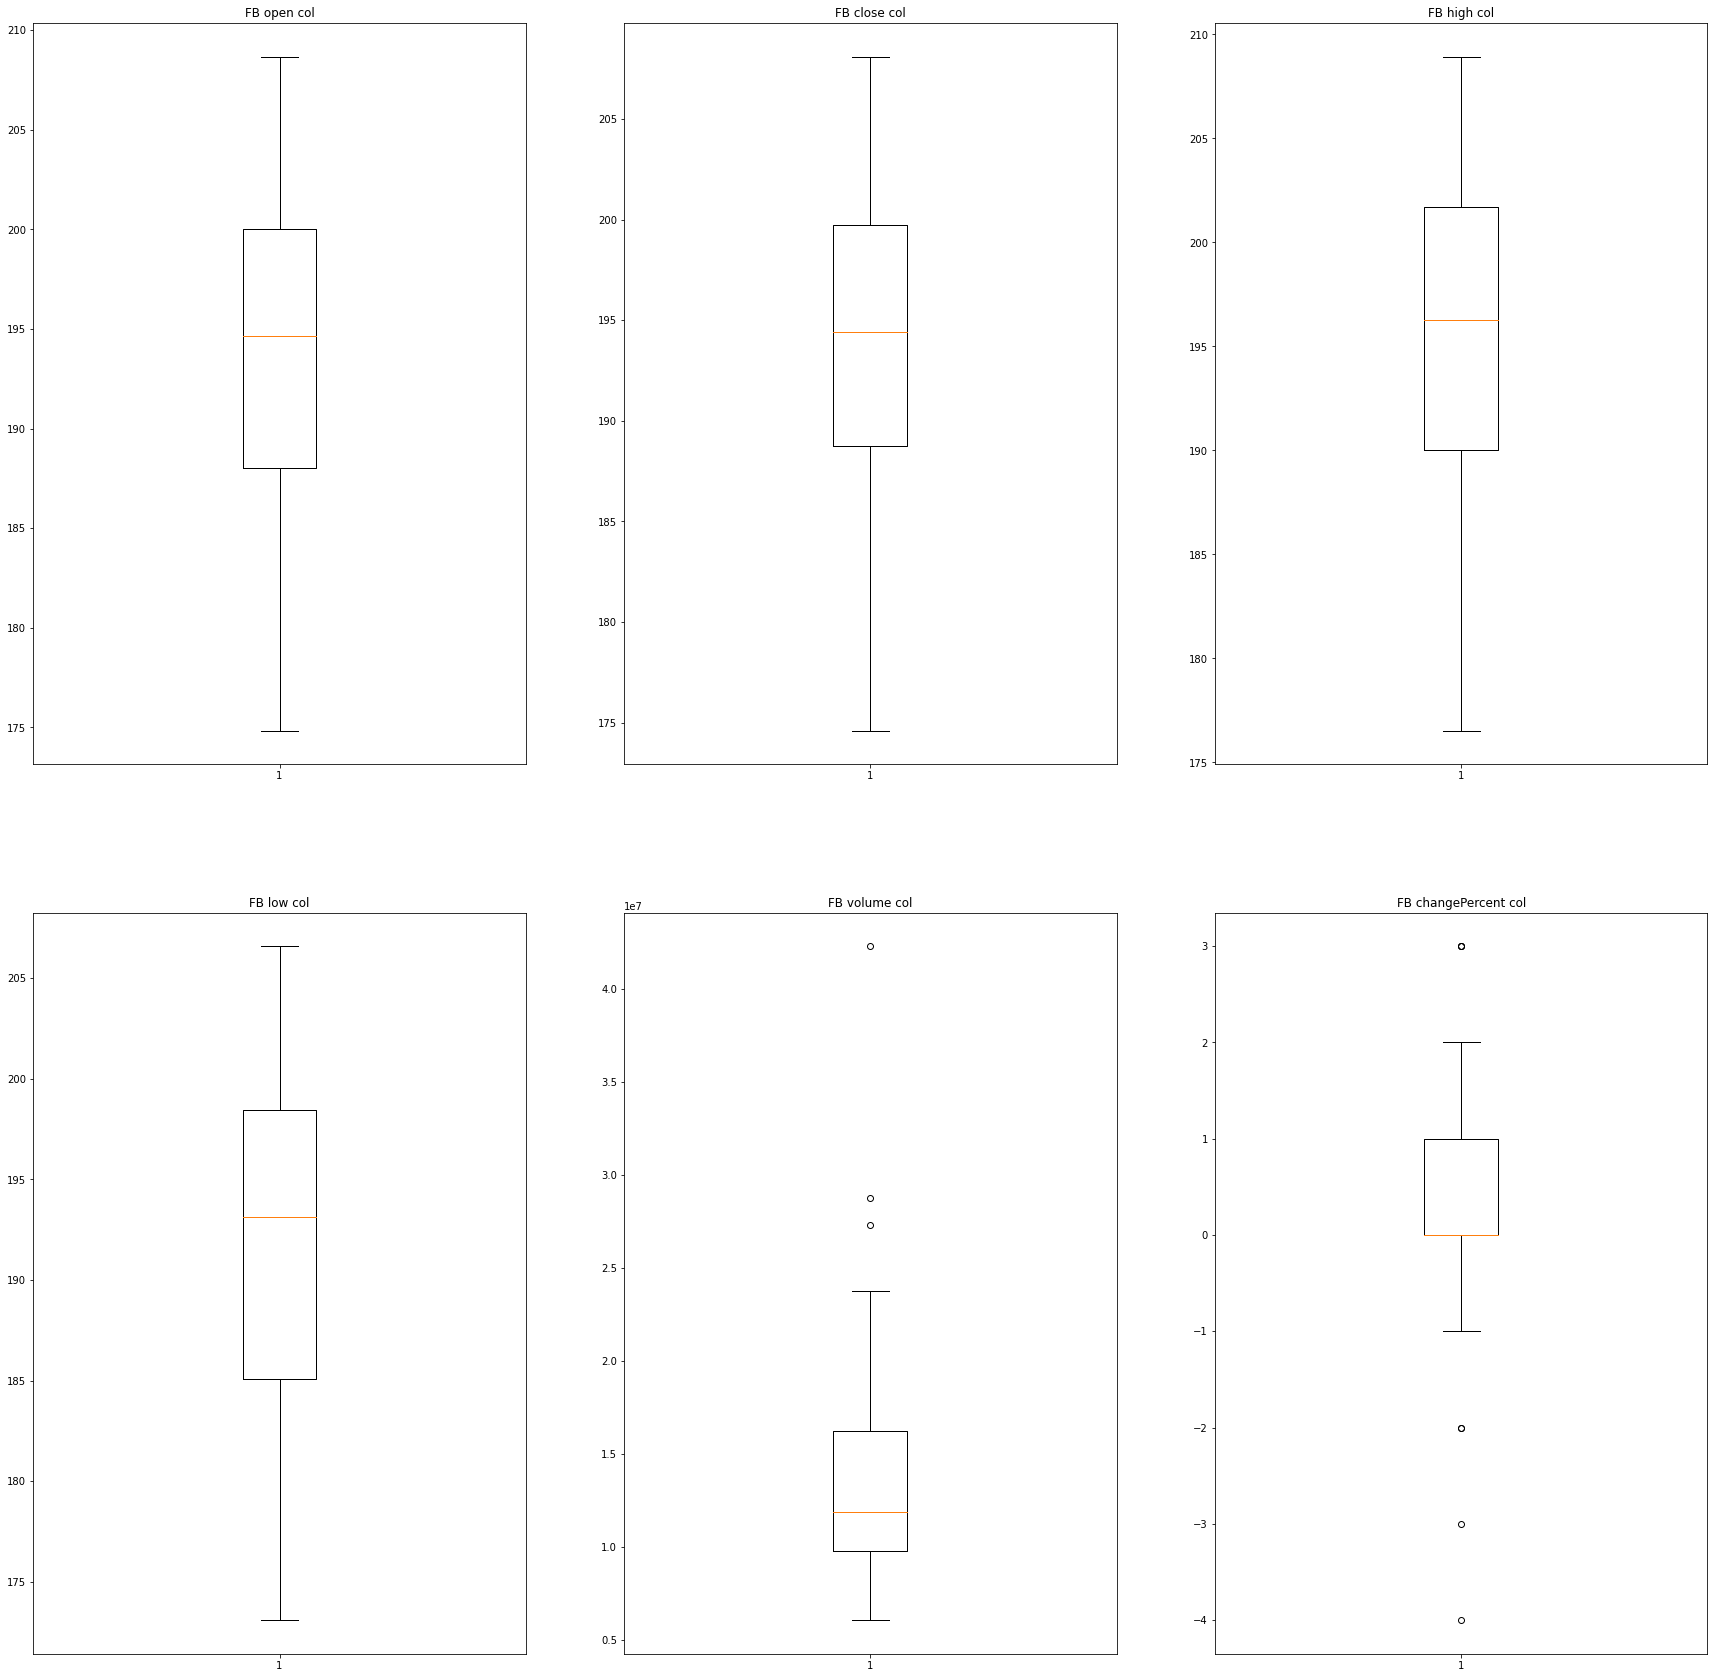

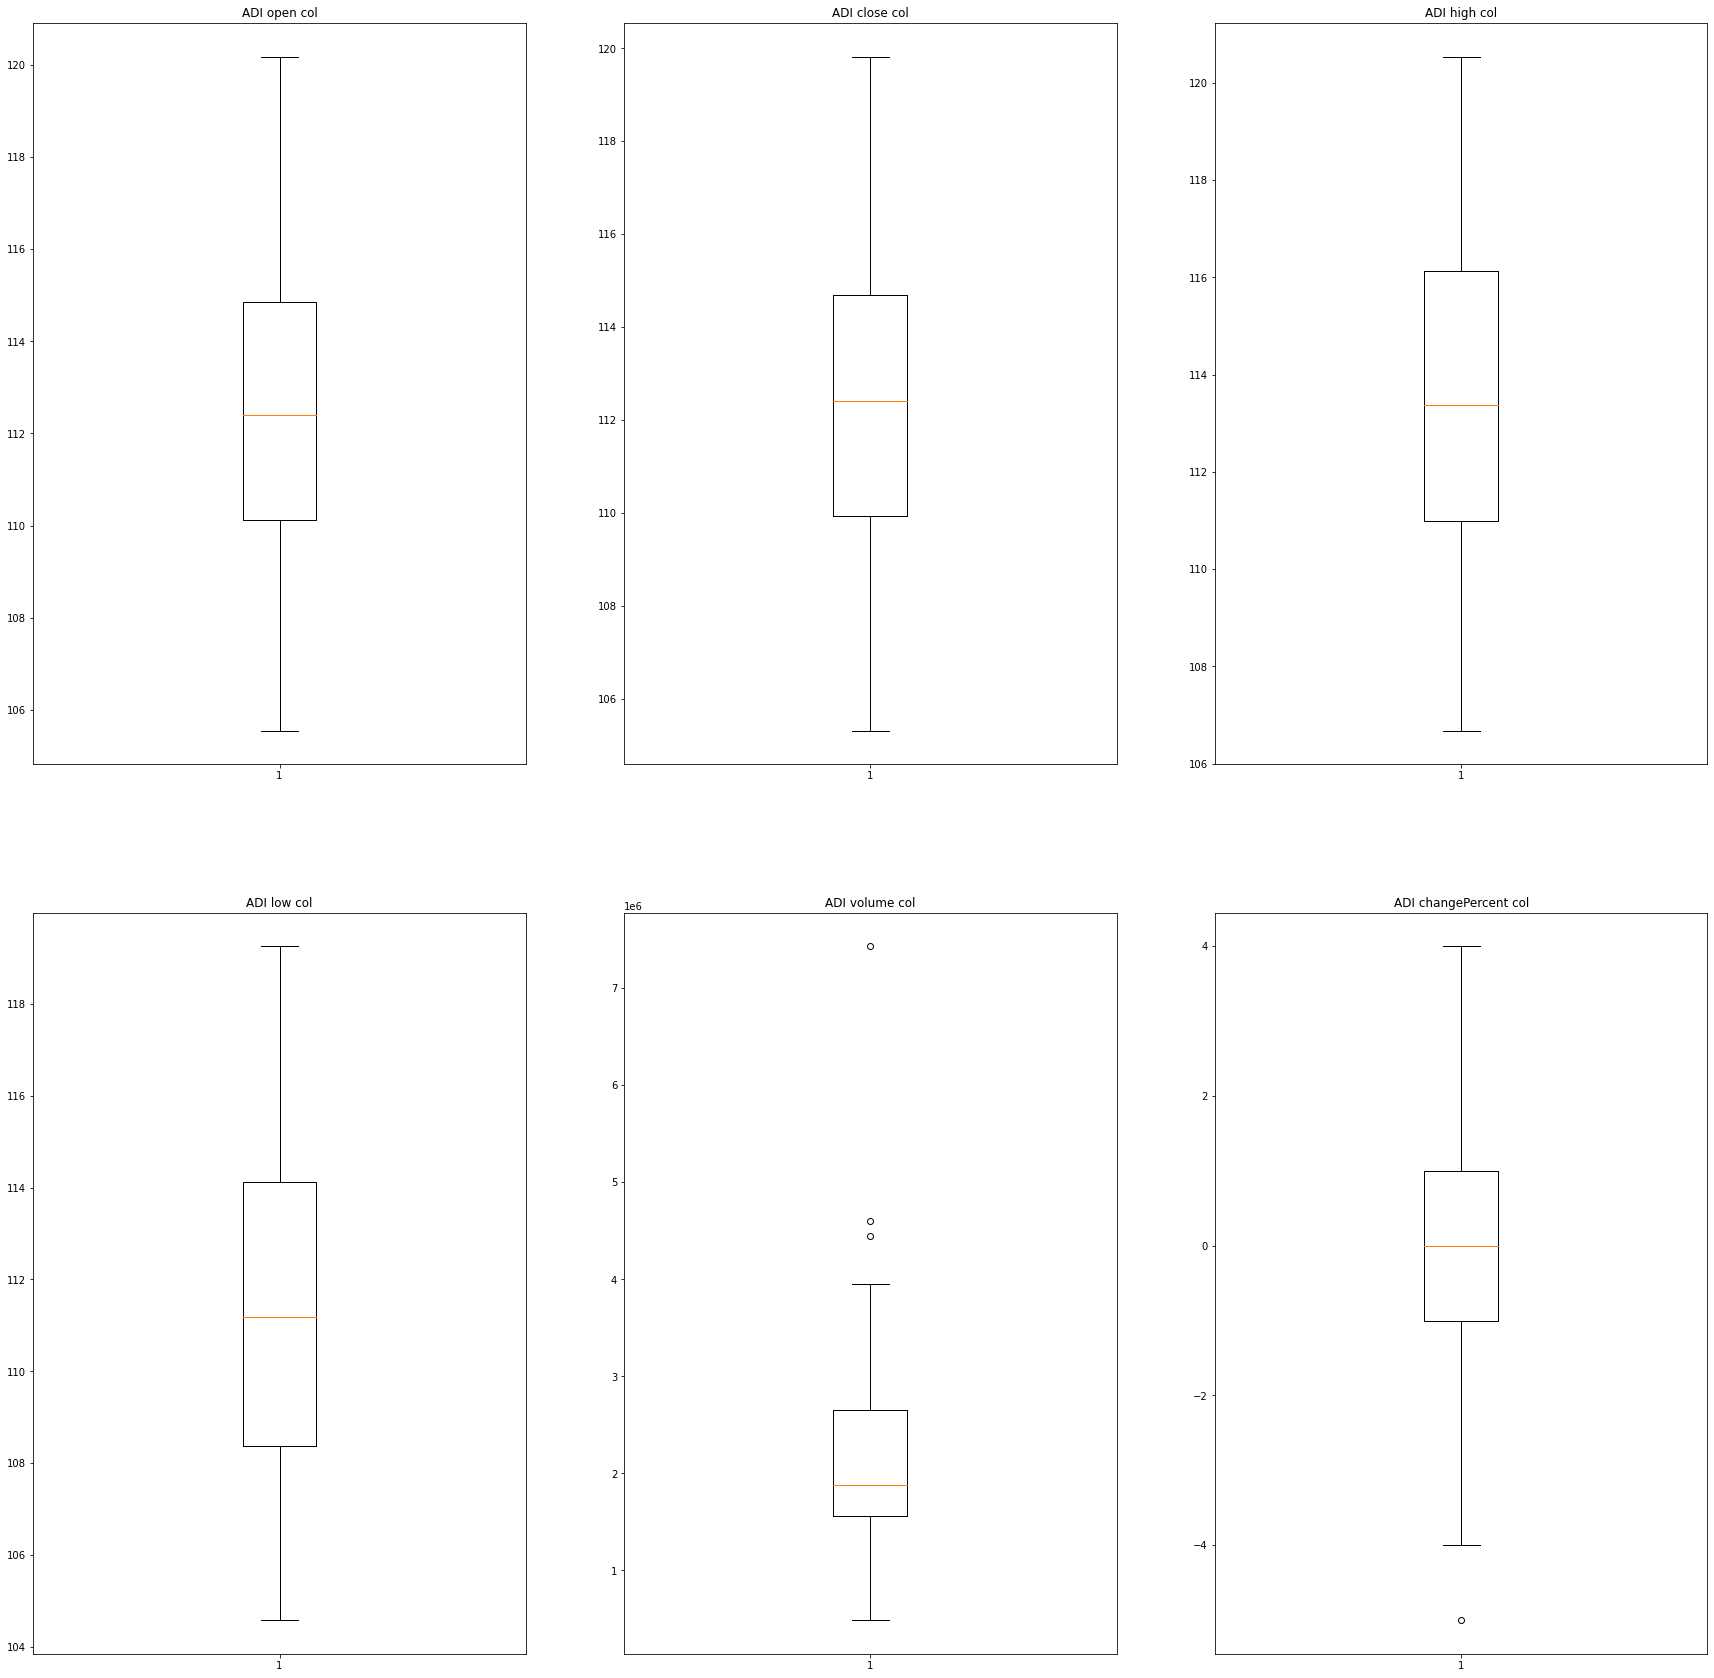

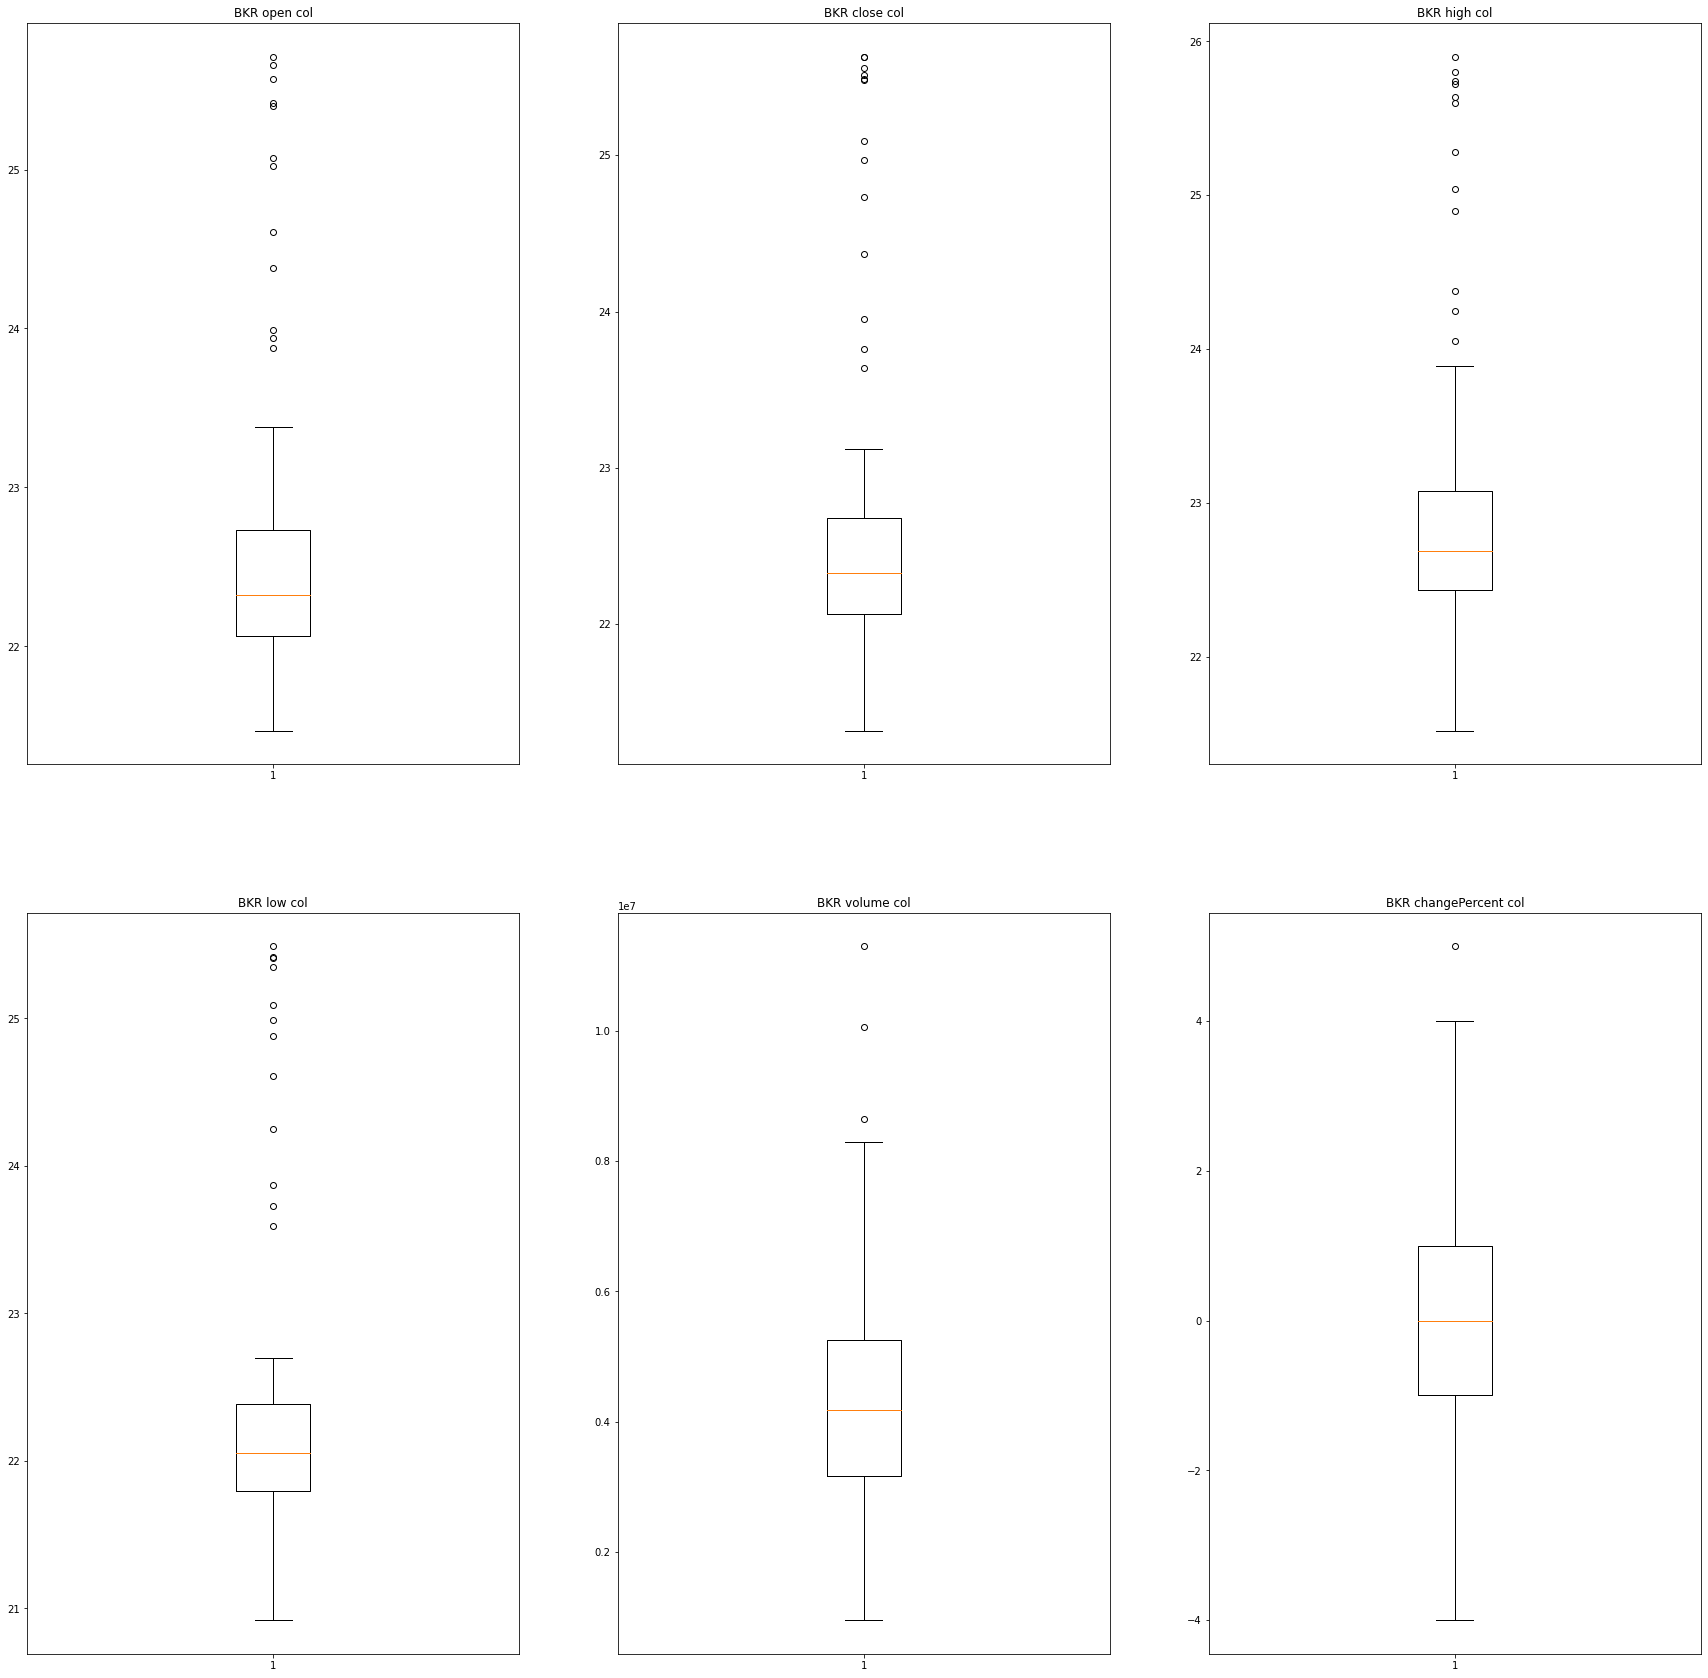

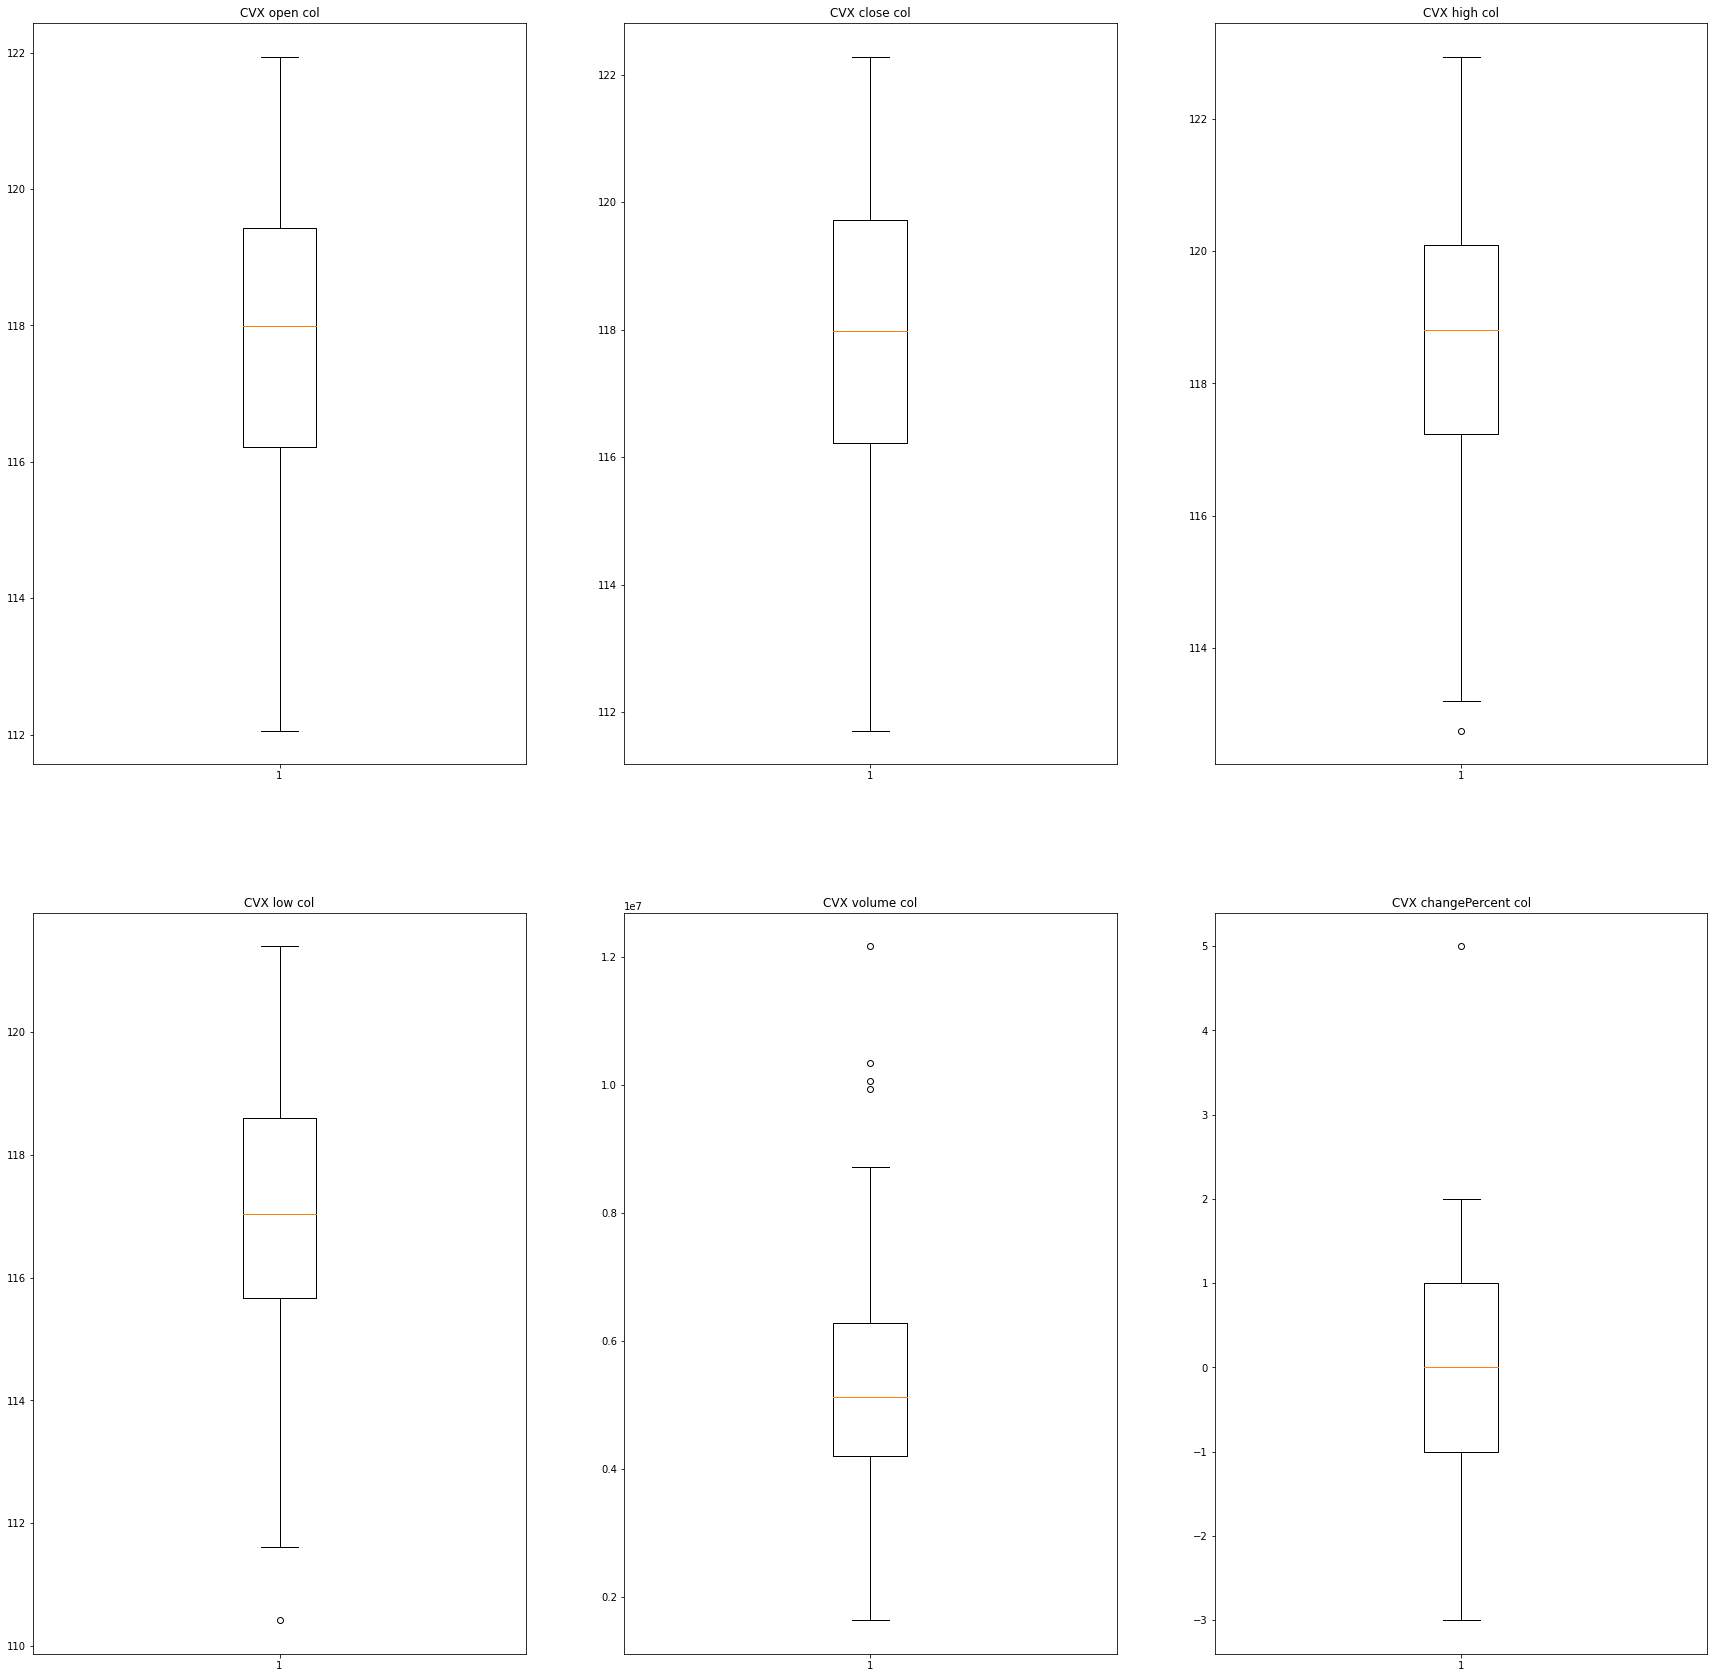

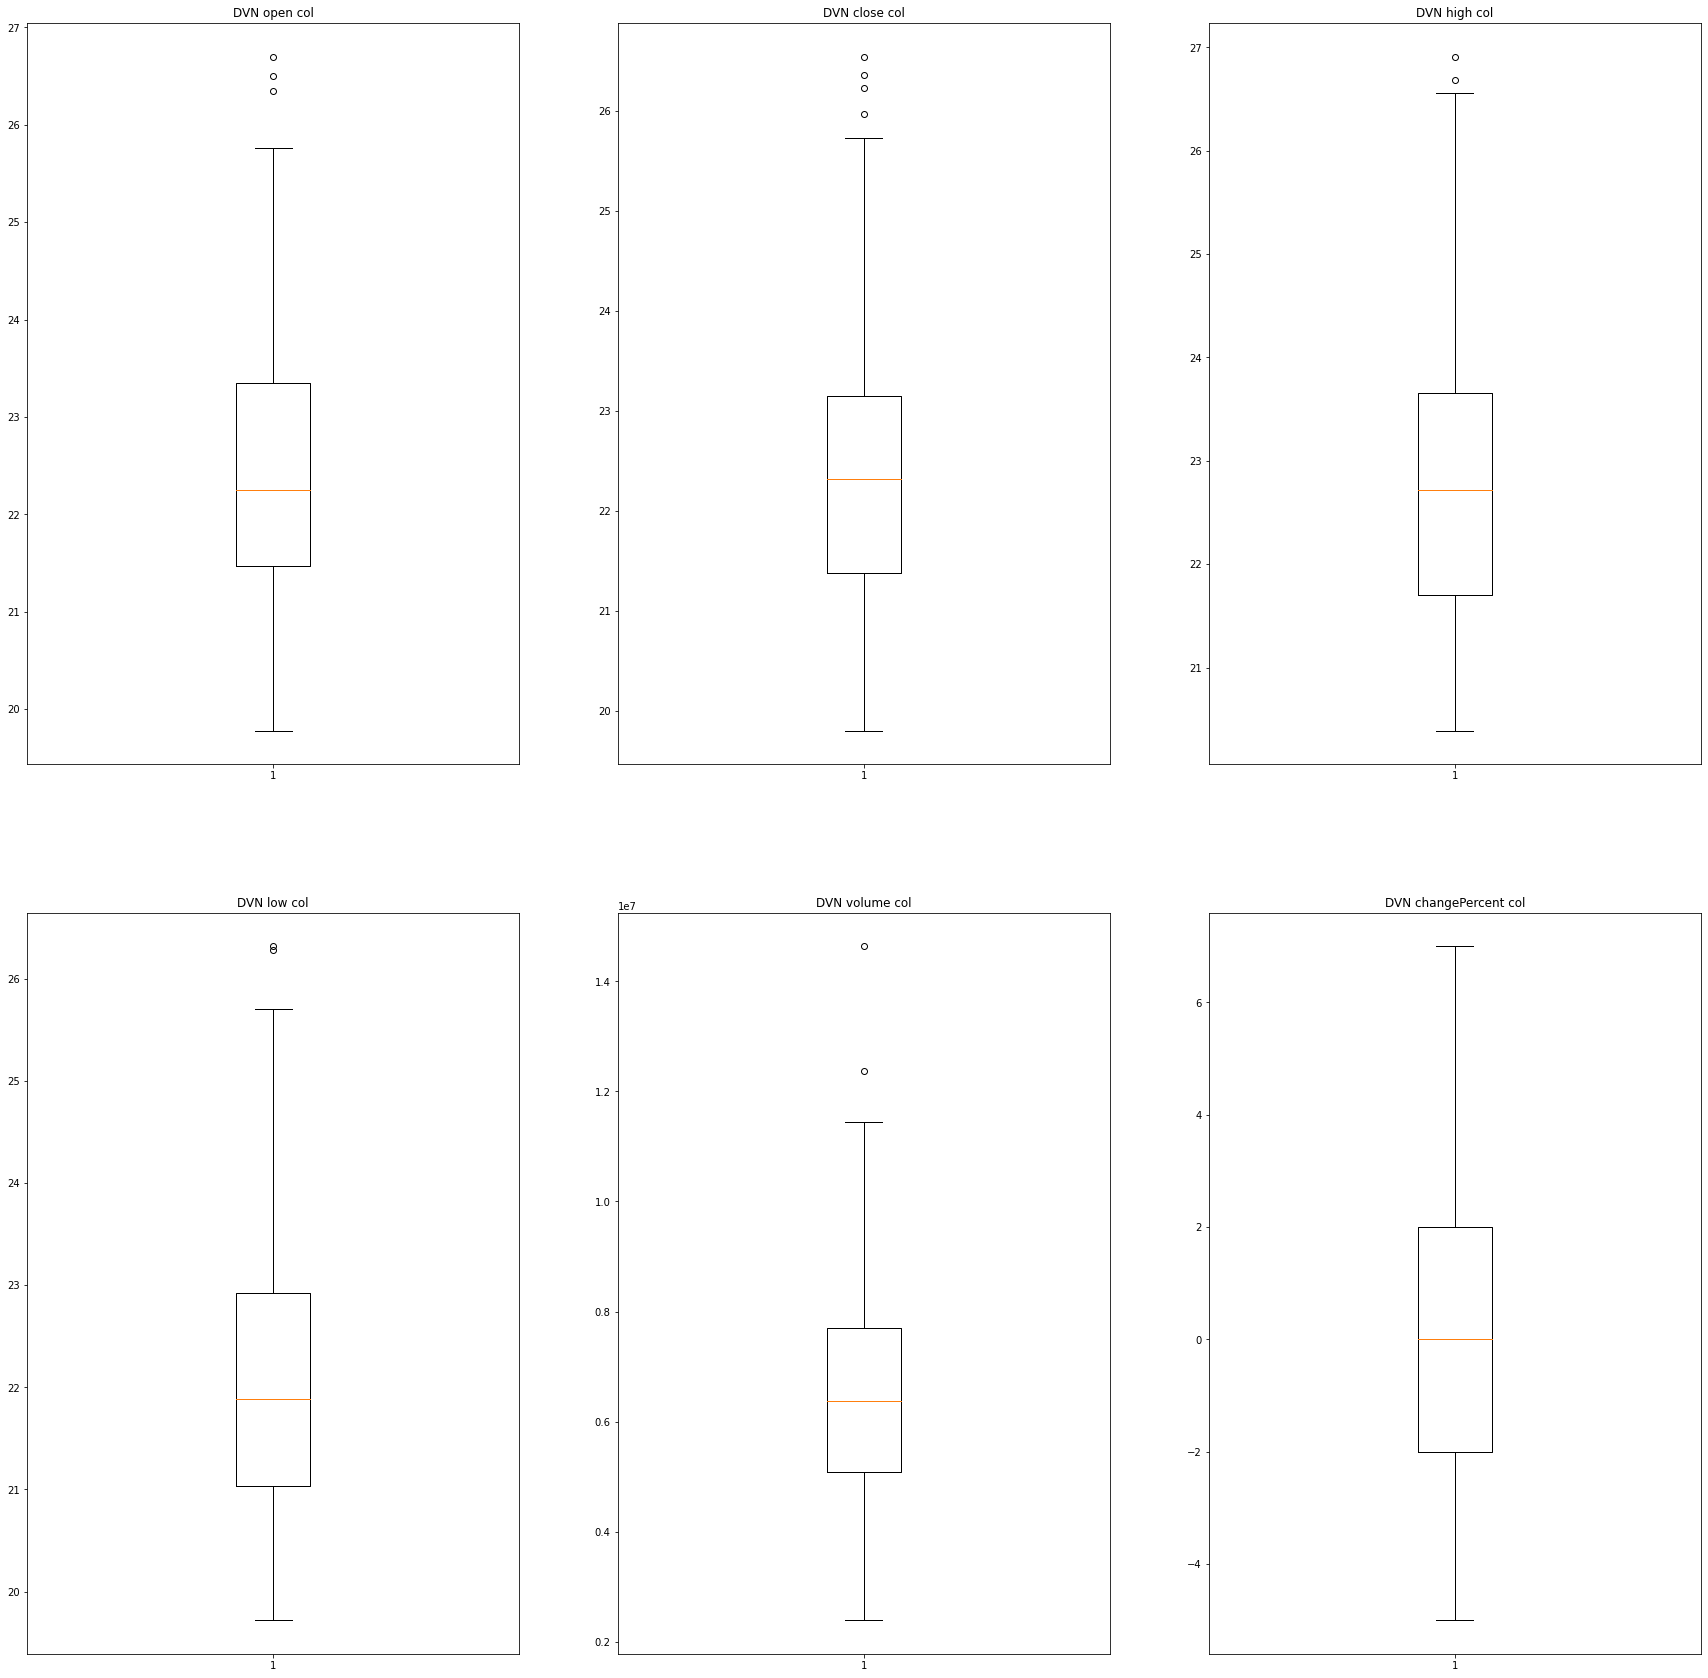

In [35]:
for symbol in my_stocks:
    outlier_(data , symbol)

In [36]:
# for symbol in my_stocks:
#     cols_list=[]
# #     fig2,a =  plt.subplots(1,6,figsize=(30,30))
# #     k=0
#     for feature in numeric_list:
#         col=data[data["symbol"]==symbol][feature]
# #         cols_list.append(col)
#         outliers= [feature for stat in boxplot_stats(col) for feature in stat['fliers']]
#         tmp_outliers="no Of feature ("+feature+") = " + str(len(outliers))+" = "
#         figure=plt.figure(figsize=(cm_to_inch(5),cm_to_inch(5)))
#         figure_ax= figure.add_axes([0,0,1,k])
#         figure_ax.set_title(symbol+'_'+feature)
#         figure_ax.boxplot(col)
# #         a[0][k].boxplot(data[data['symbol'] == symbol][feature])
# #         a[0][k].set_title(f'{feature} outlier')
#         plt.show()
#         k=k+1


### Findings and conclusions 
- Volume column has the most outliers and is the most different from all other numerical variables, so it should be scaled (normalized)


## Variable normalization

In [37]:
# Normalizing variables’ values enhances the performance of ML algorithms. Examine the values
# of the dataset’s variables and standardize them.
# New_df=data.drop(columns=['symbol','open','close','high','low','changePercent','date','companyName','sector'])

In [38]:
# set up the scaler
from sklearn.preprocessing import RobustScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()
numeric_list=['volume']
# fit the scaler
scaler.fit(data[numeric_list])

# transform 
data_scaled = scaler.transform(data[numeric_list])


In [39]:
data_scaled = pd.DataFrame(data_scaled, columns=numeric_list)


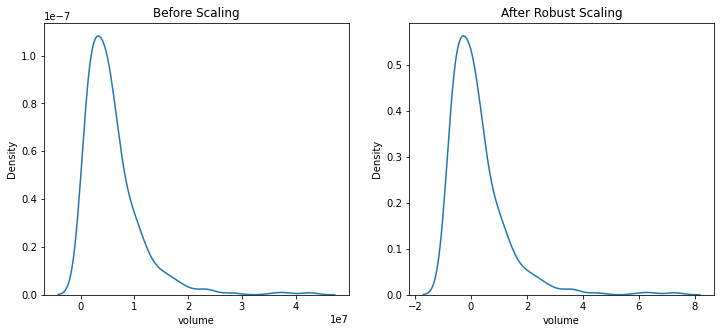

In [40]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
# sns.kdeplot(data['open'], ax=ax1)
sns.kdeplot(data['volume'], ax=ax1)
# sns.kdeplot(data['close'], ax=ax1)
# sns.kdeplot(data['high'], ax=ax1)
# sns.kdeplot(data['low'], ax=ax1)
# sns.kdeplot(data['changePercent'], ax=ax1)
# sns.kdeplot(X_train['LSTAT'], ax=ax1)
# sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling using kdeplot
ax2.set_title('After Robust Scaling')
# sns.kdeplot(data_scaled['open'], ax=ax2)
sns.kdeplot(data_scaled['volume'], ax=ax2)
# sns.kdeplot(data_scaled['close'], ax=ax2)
# sns.kdeplot(data_scaled['high'], ax=ax2)
# sns.kdeplot(data_scaled['low'], ax=ax2)
# sns.kdeplot(data_scaled['changePercent'], ax=ax2)
# sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
# sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
# plt.xlabel('volume and changePercent')
plt.show()

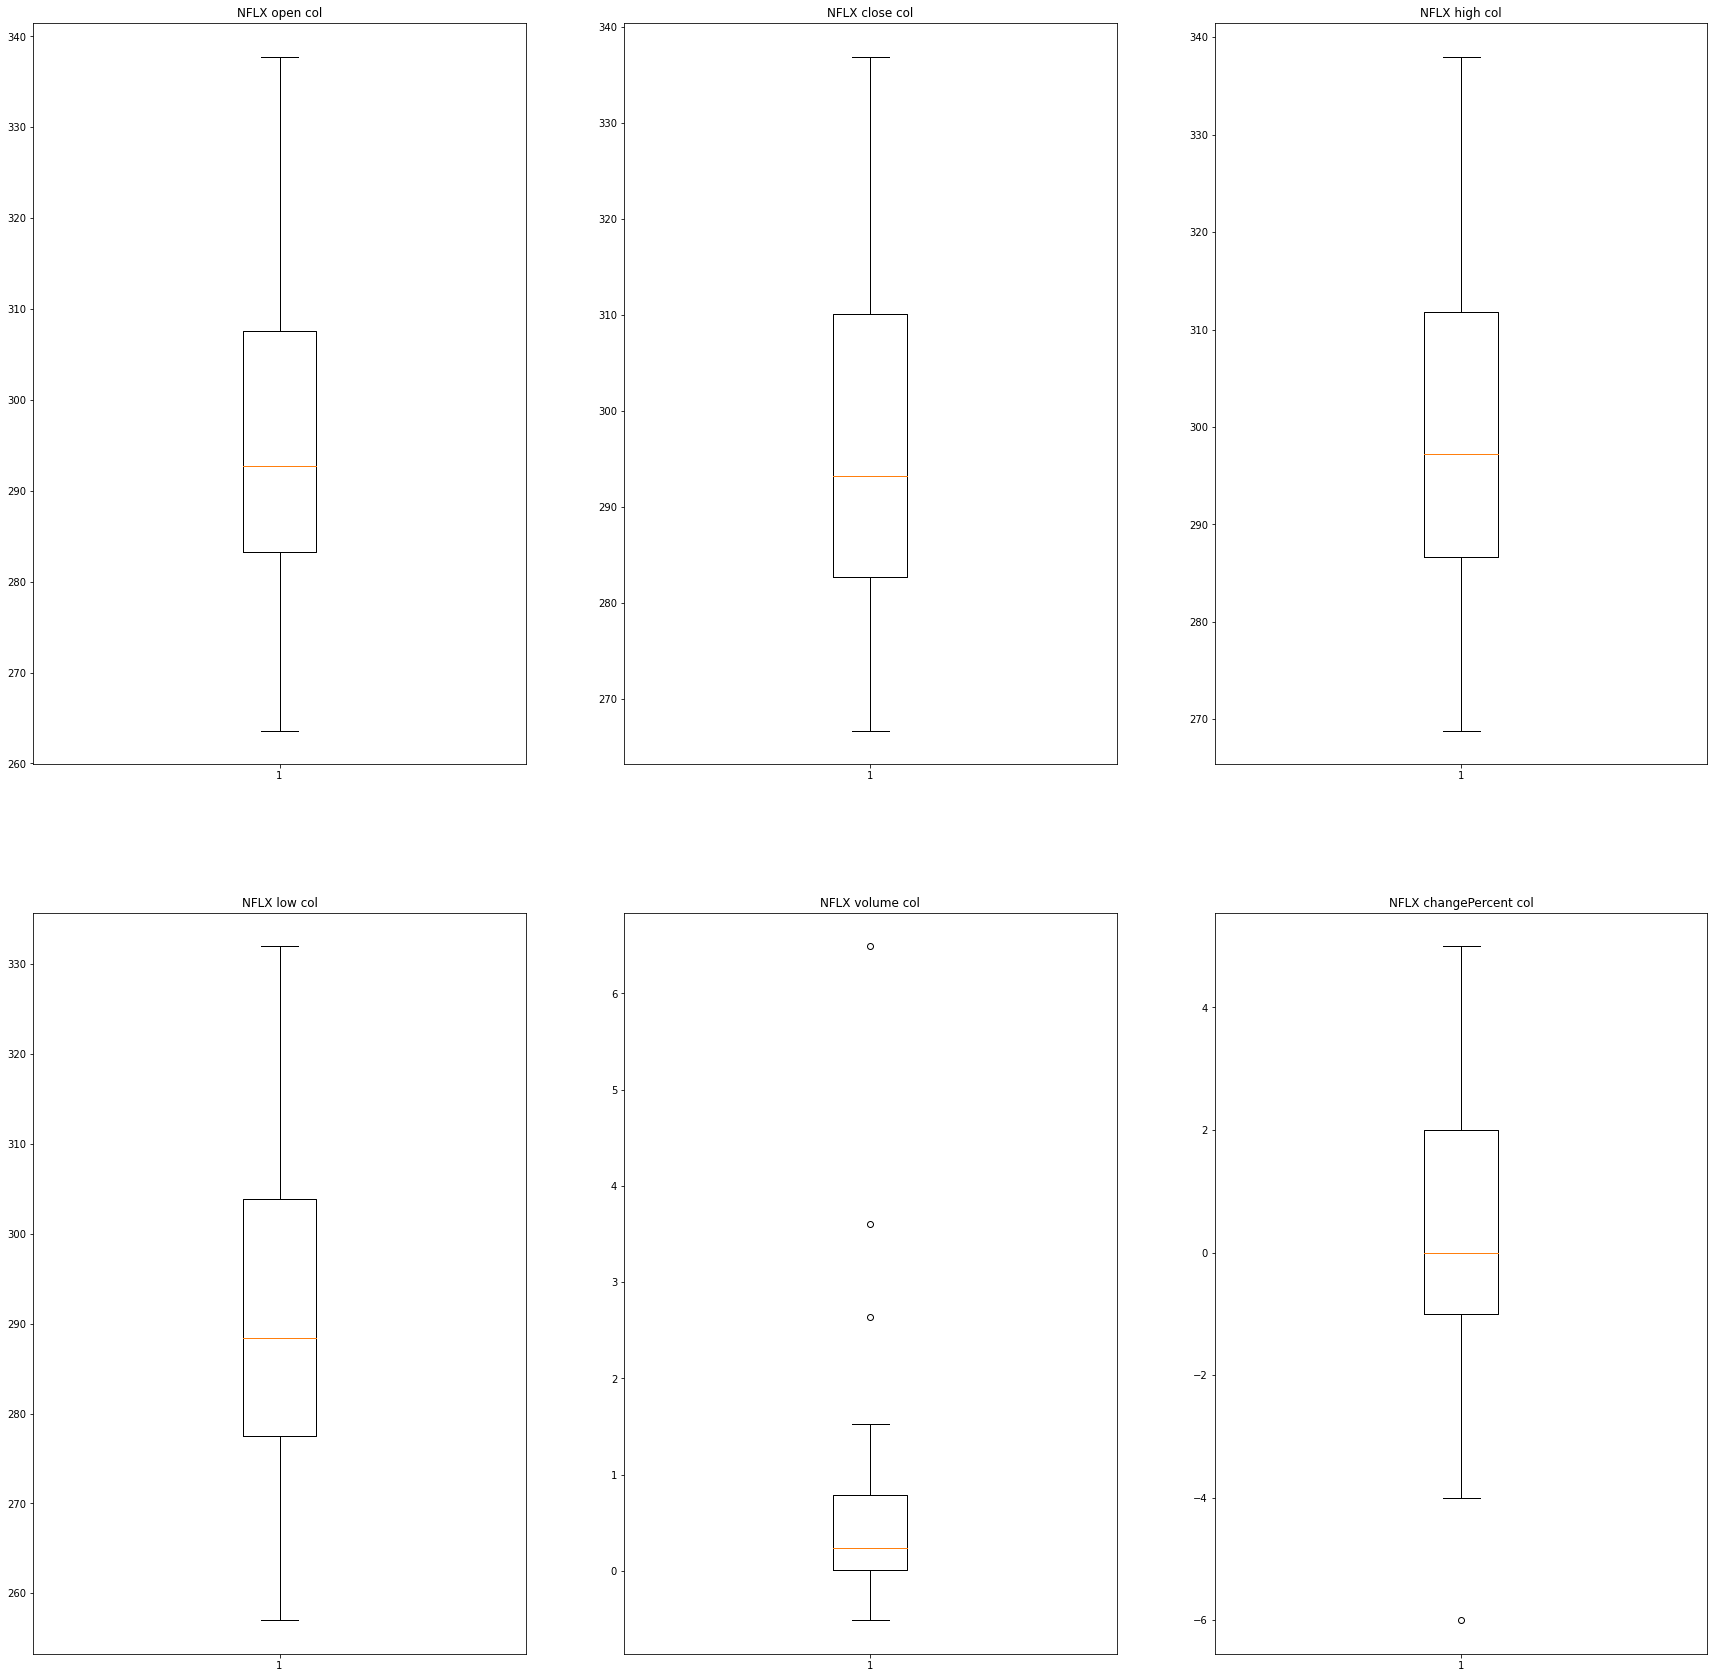

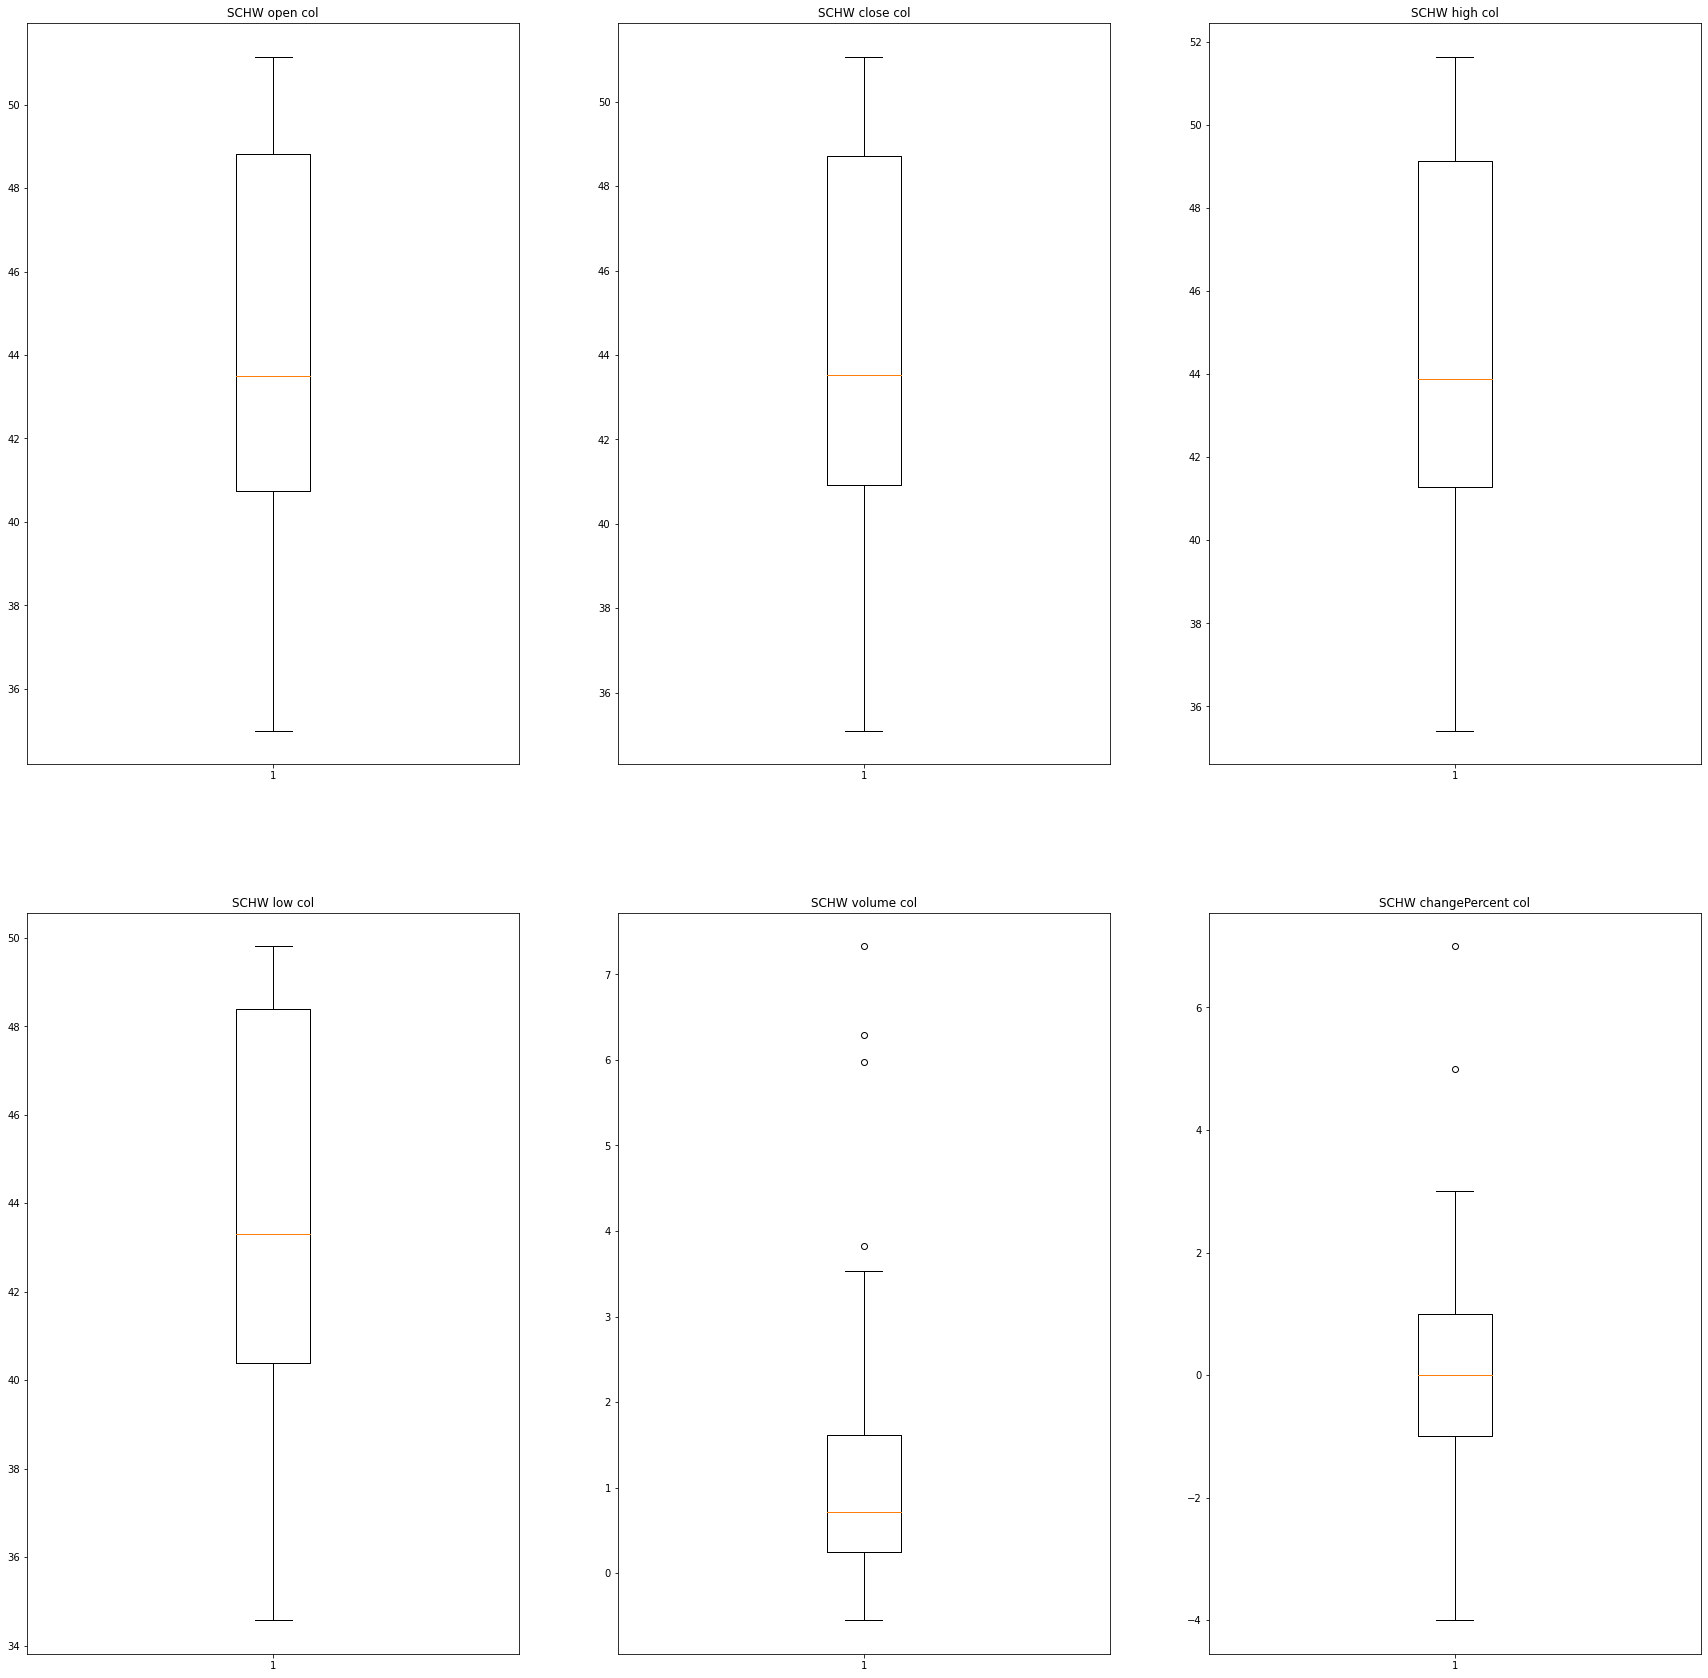

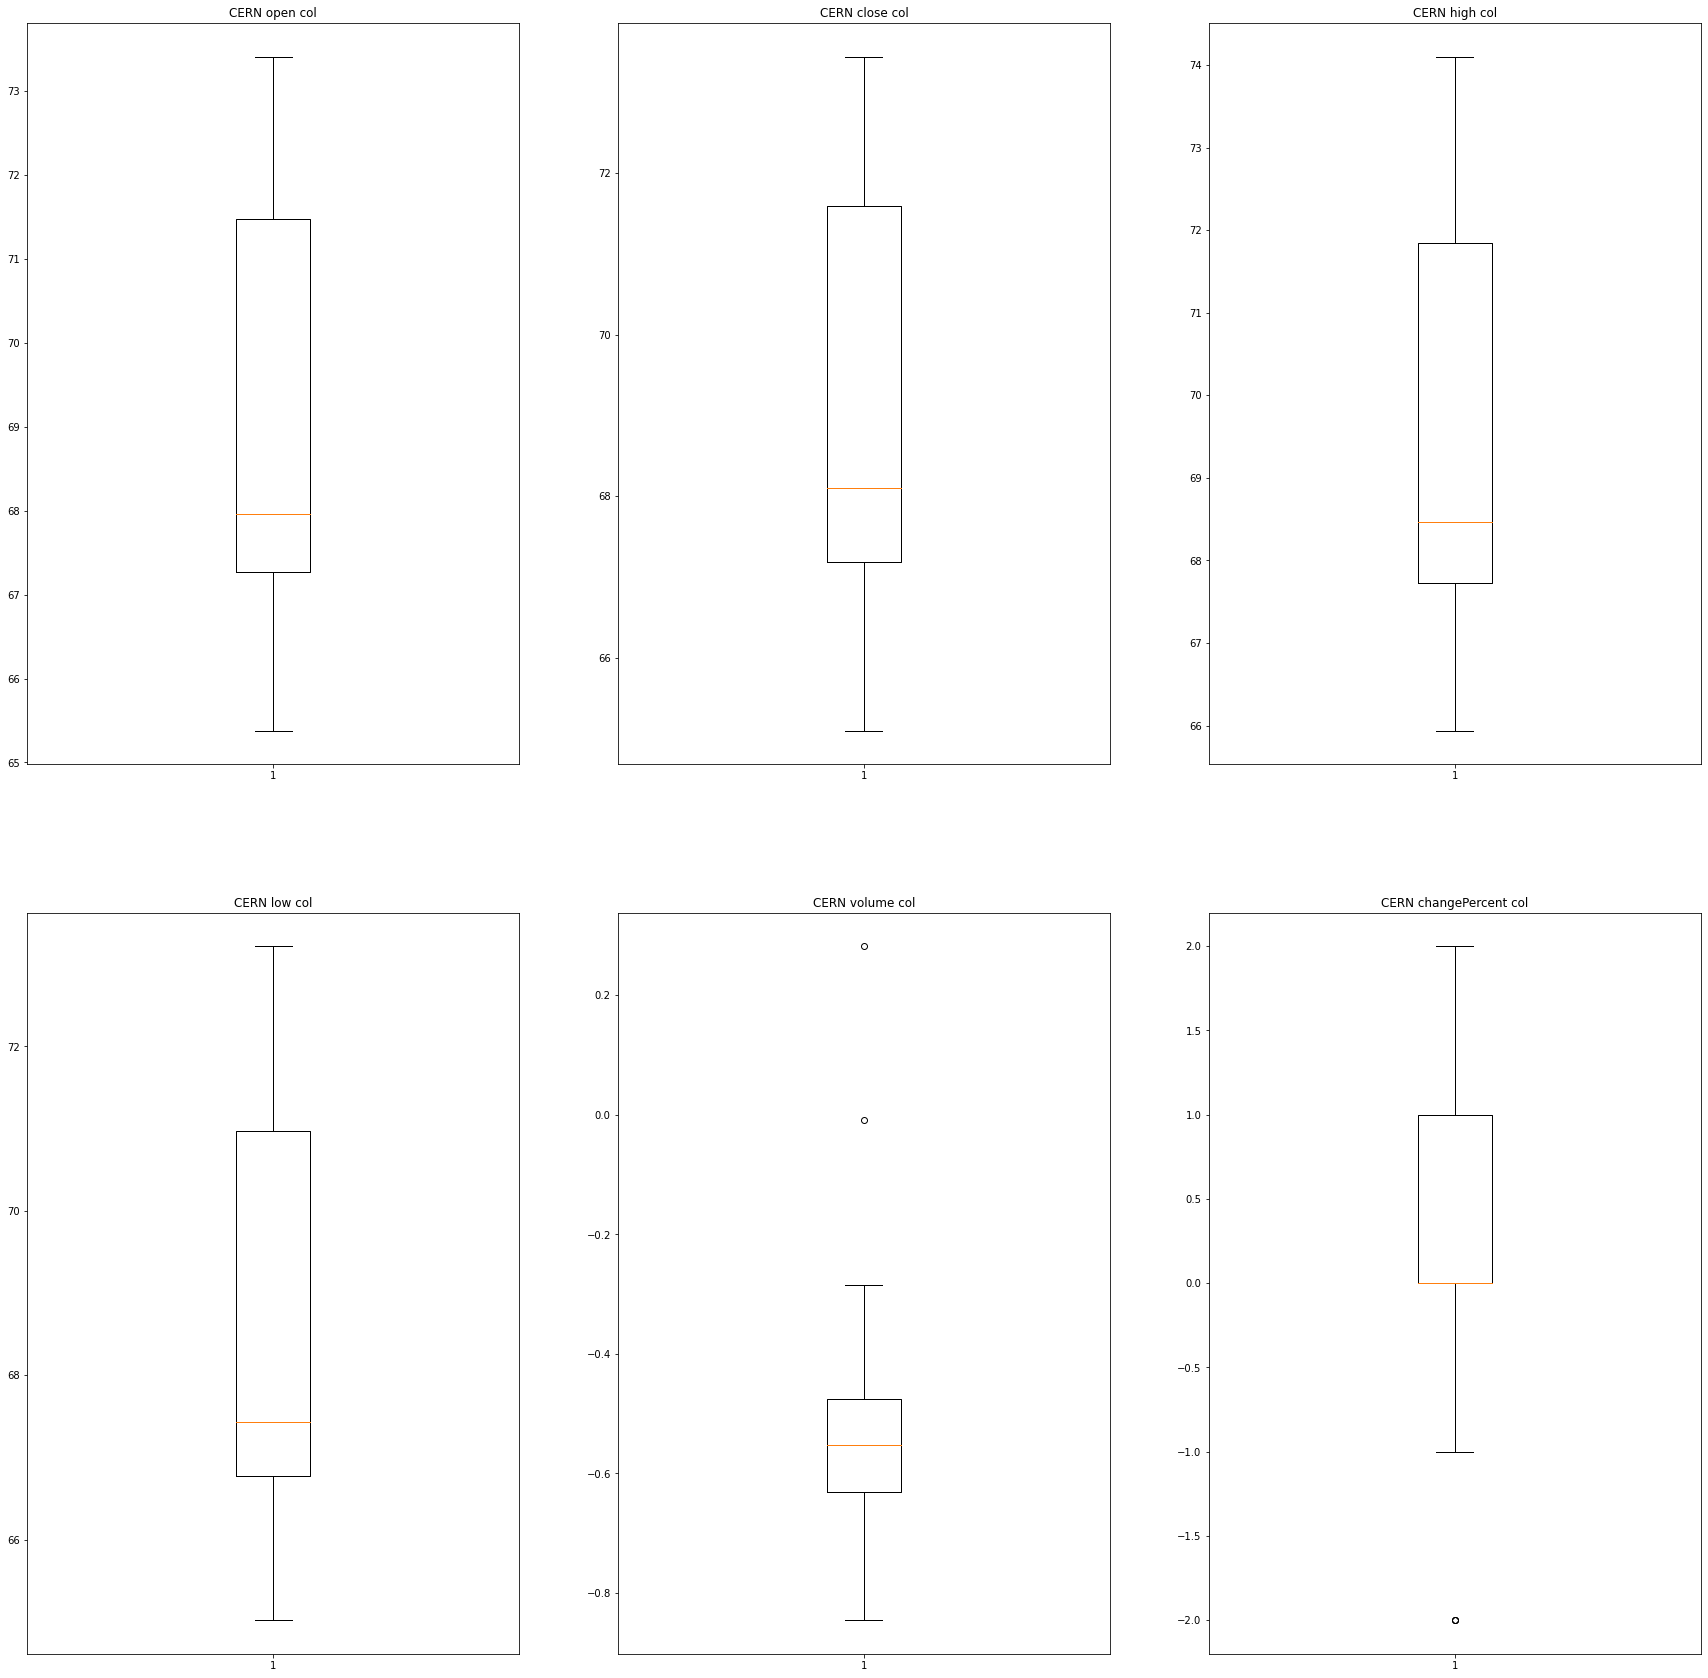

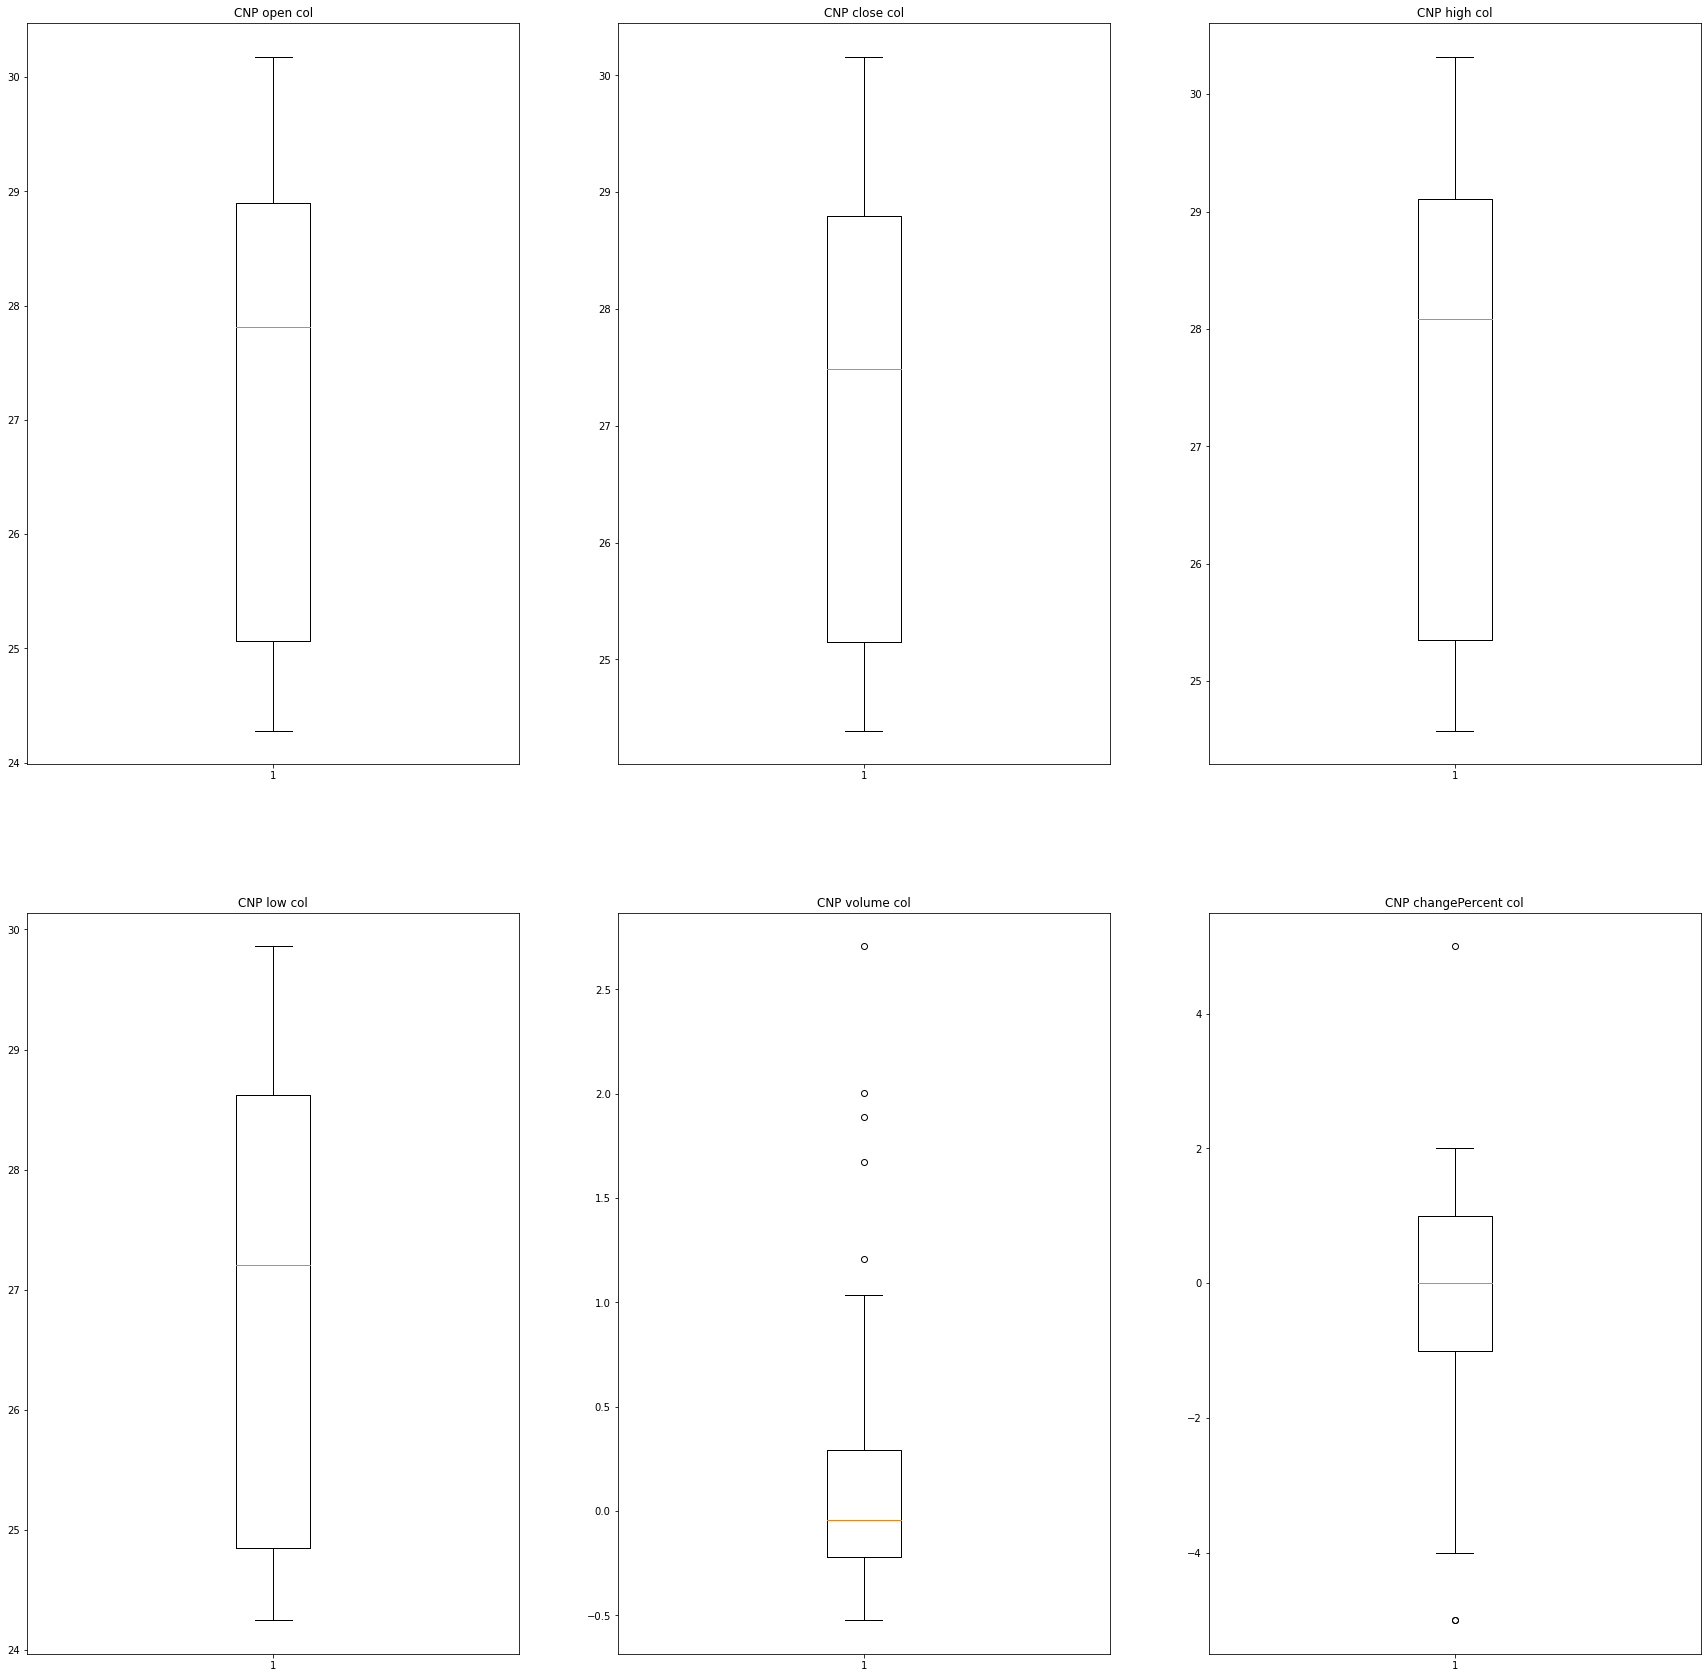

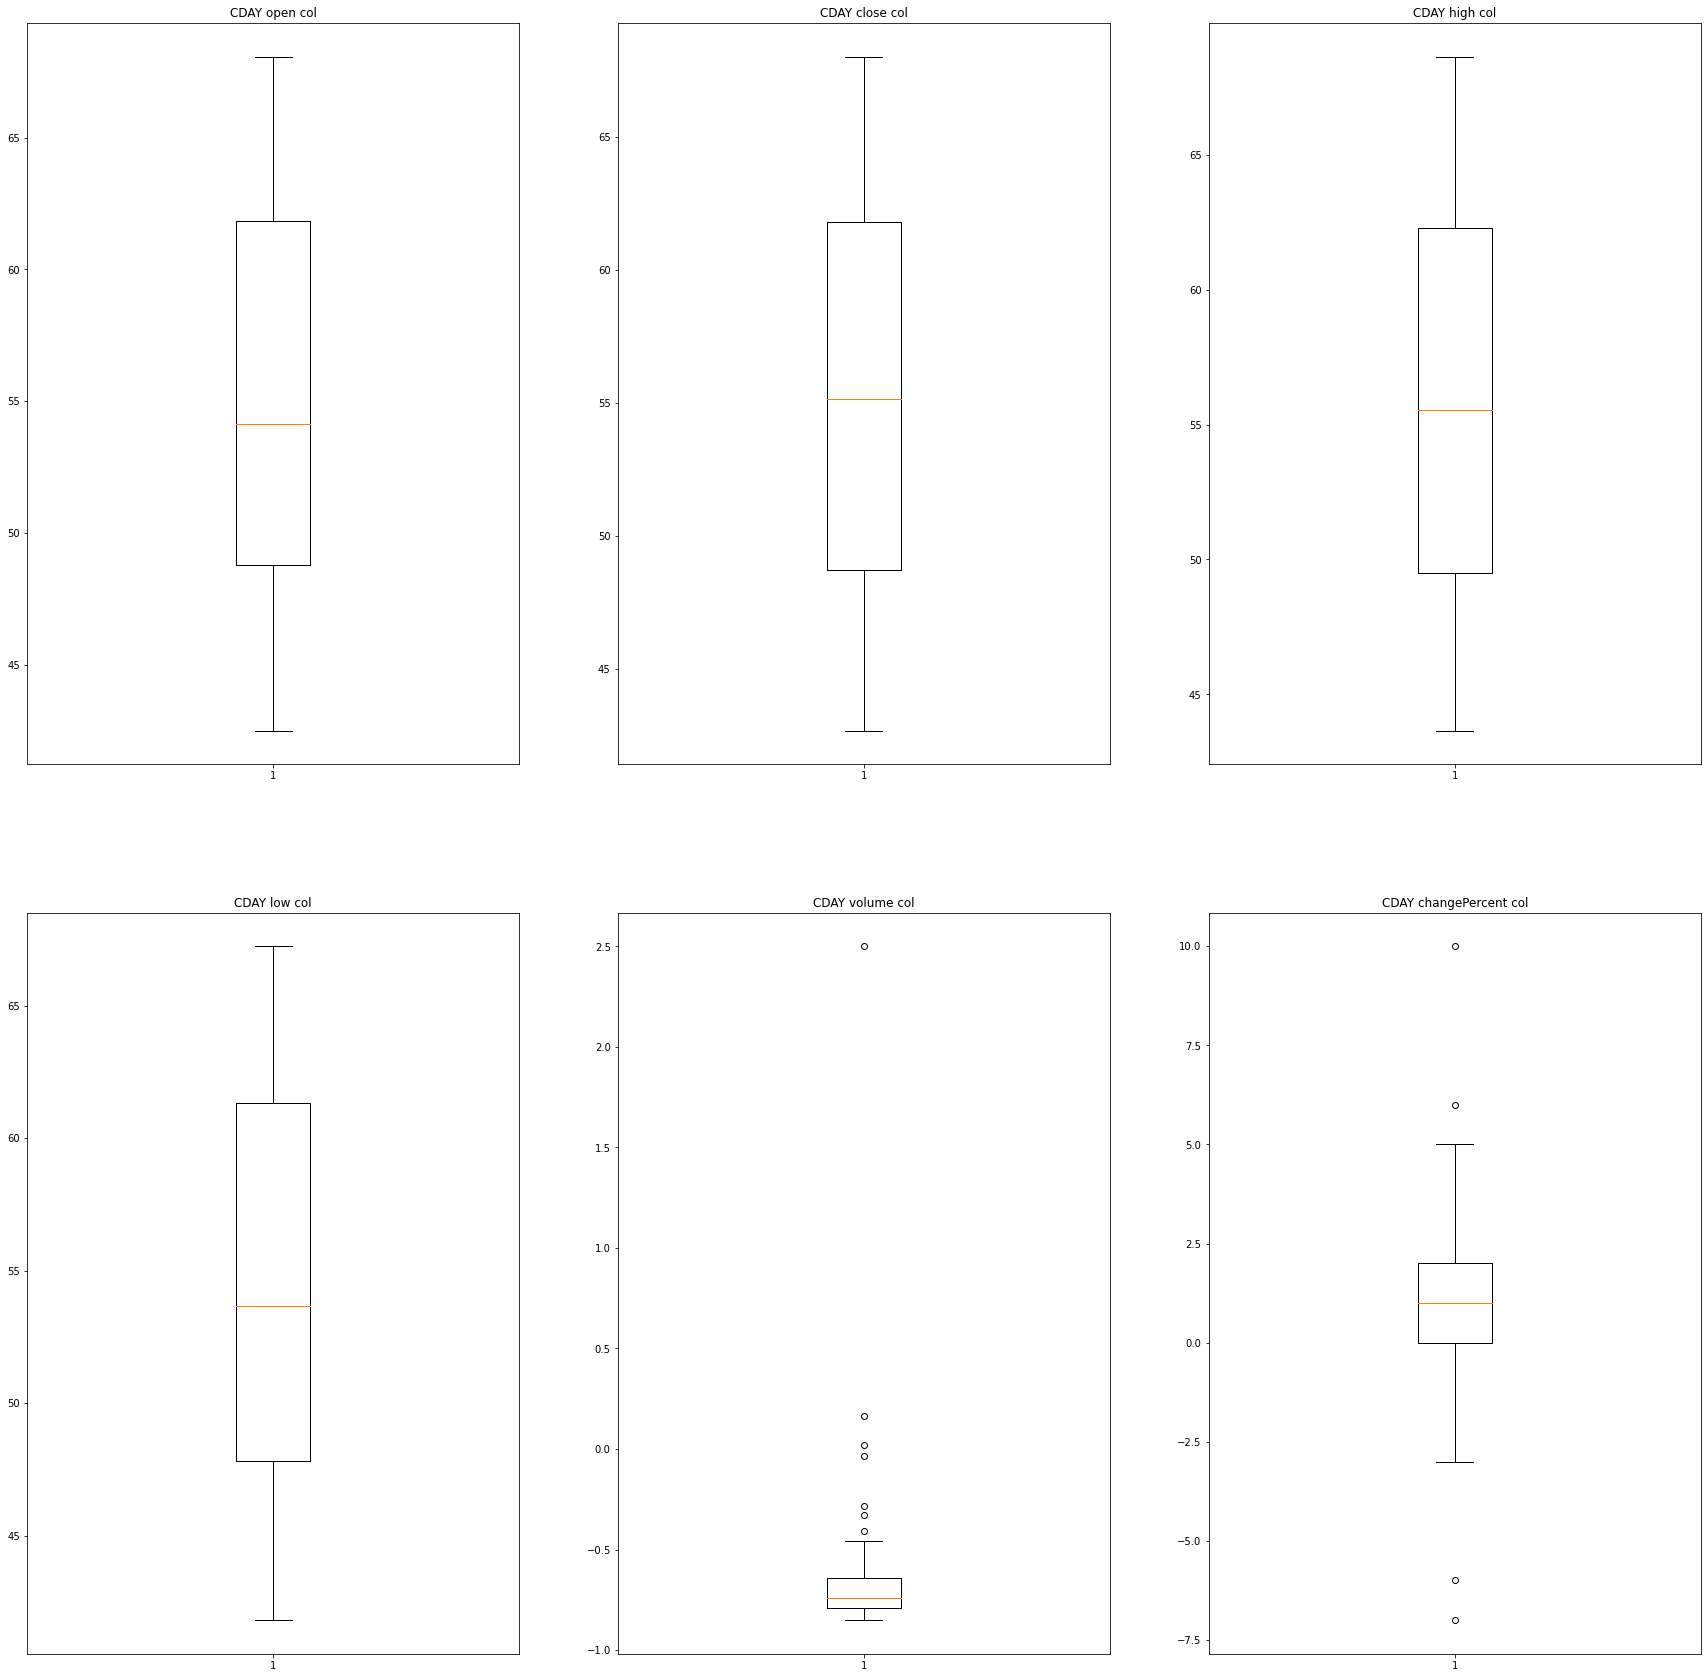

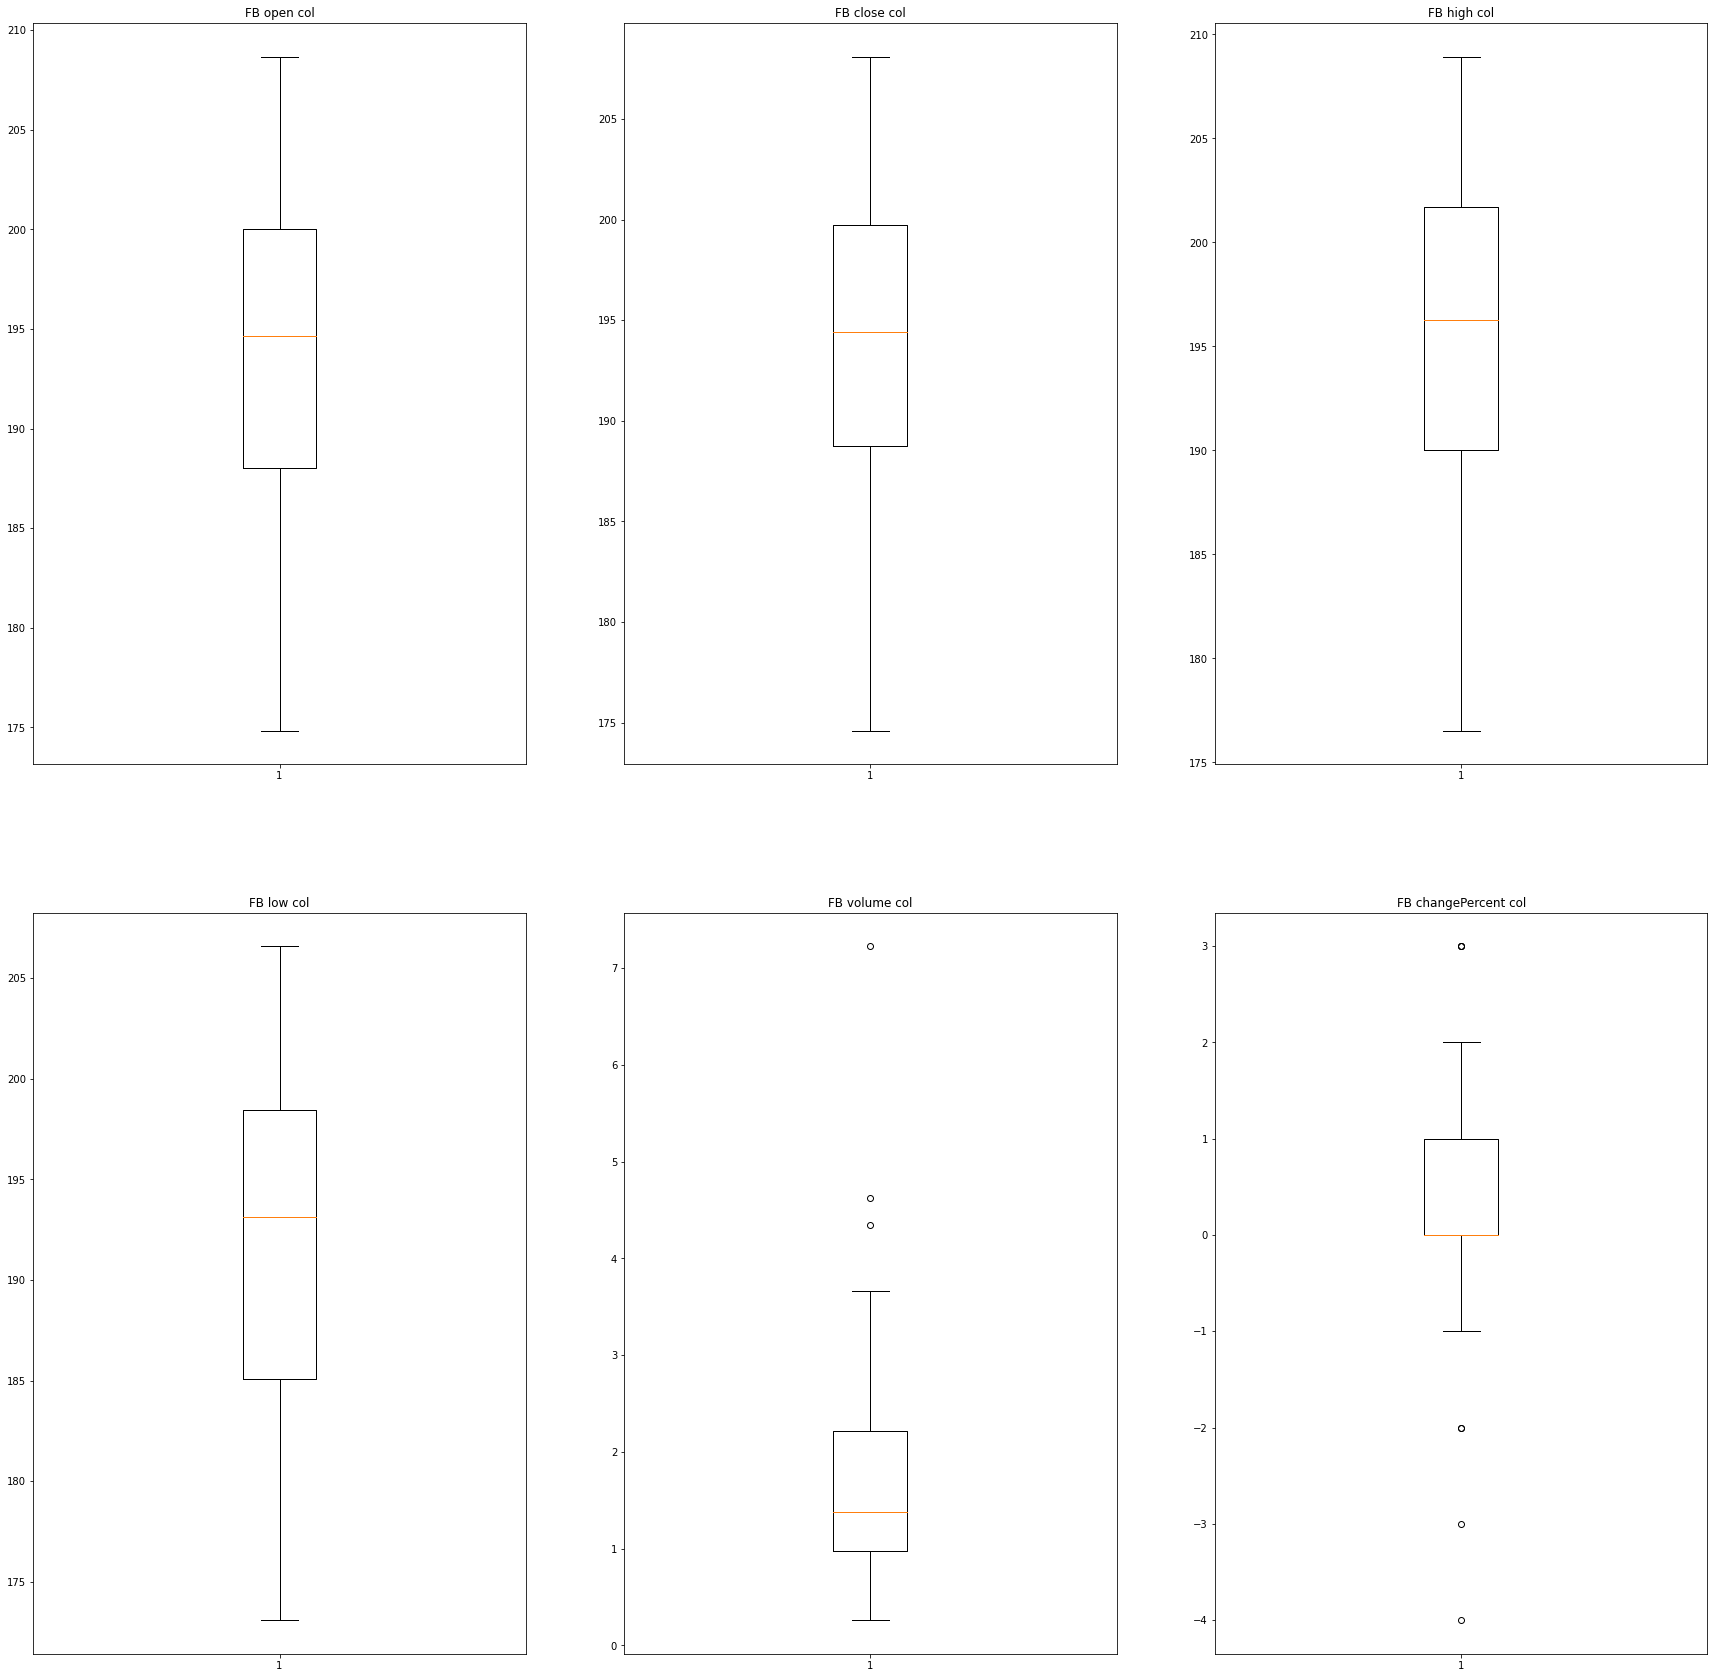

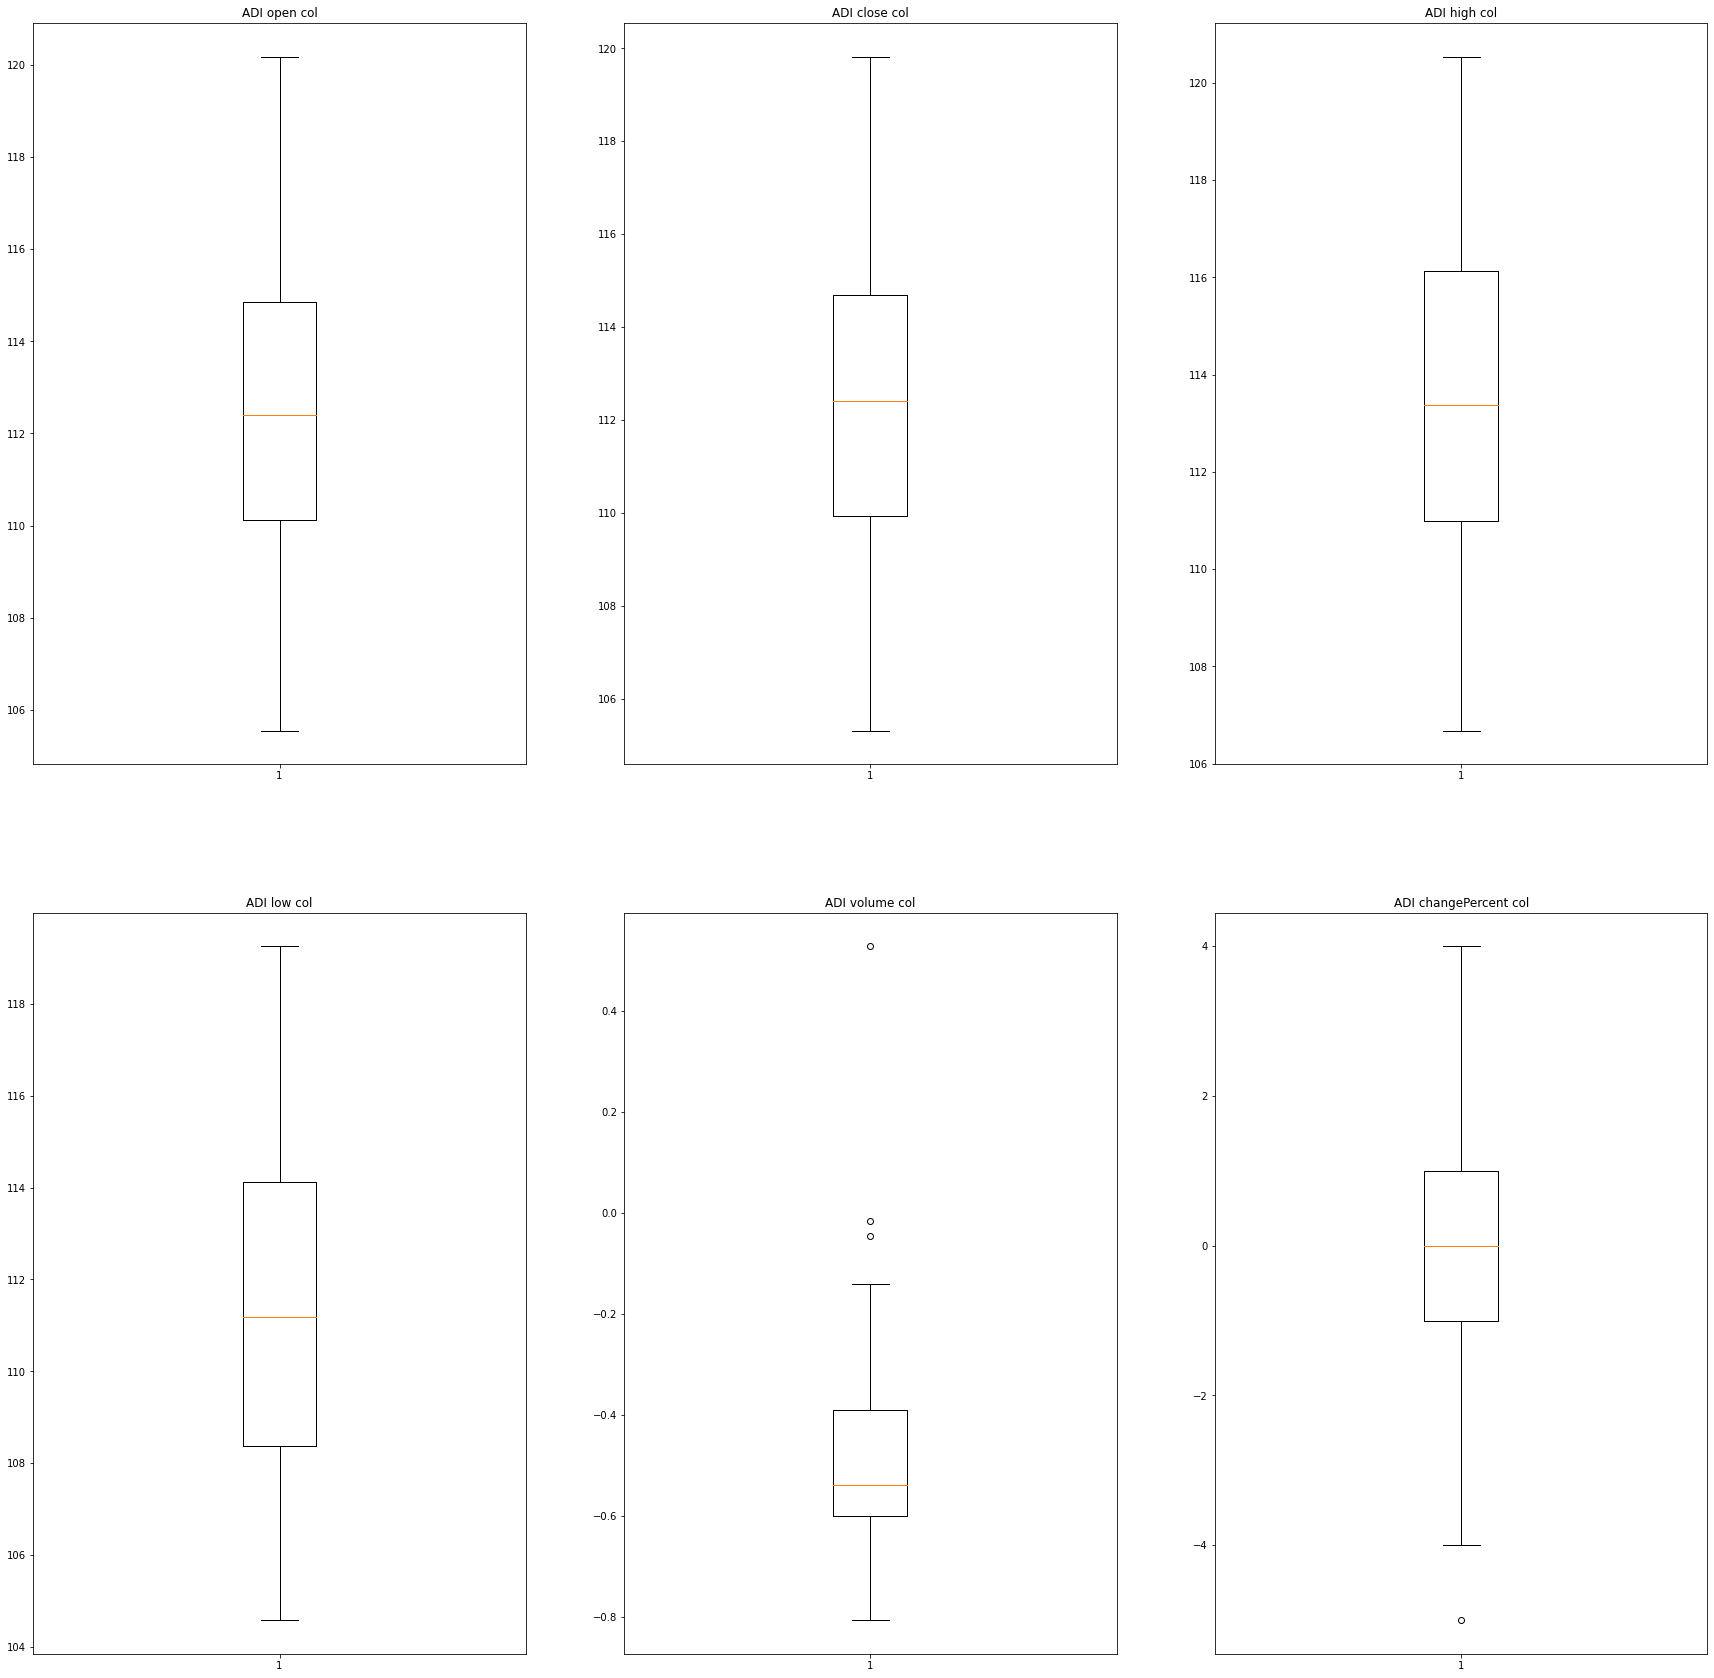

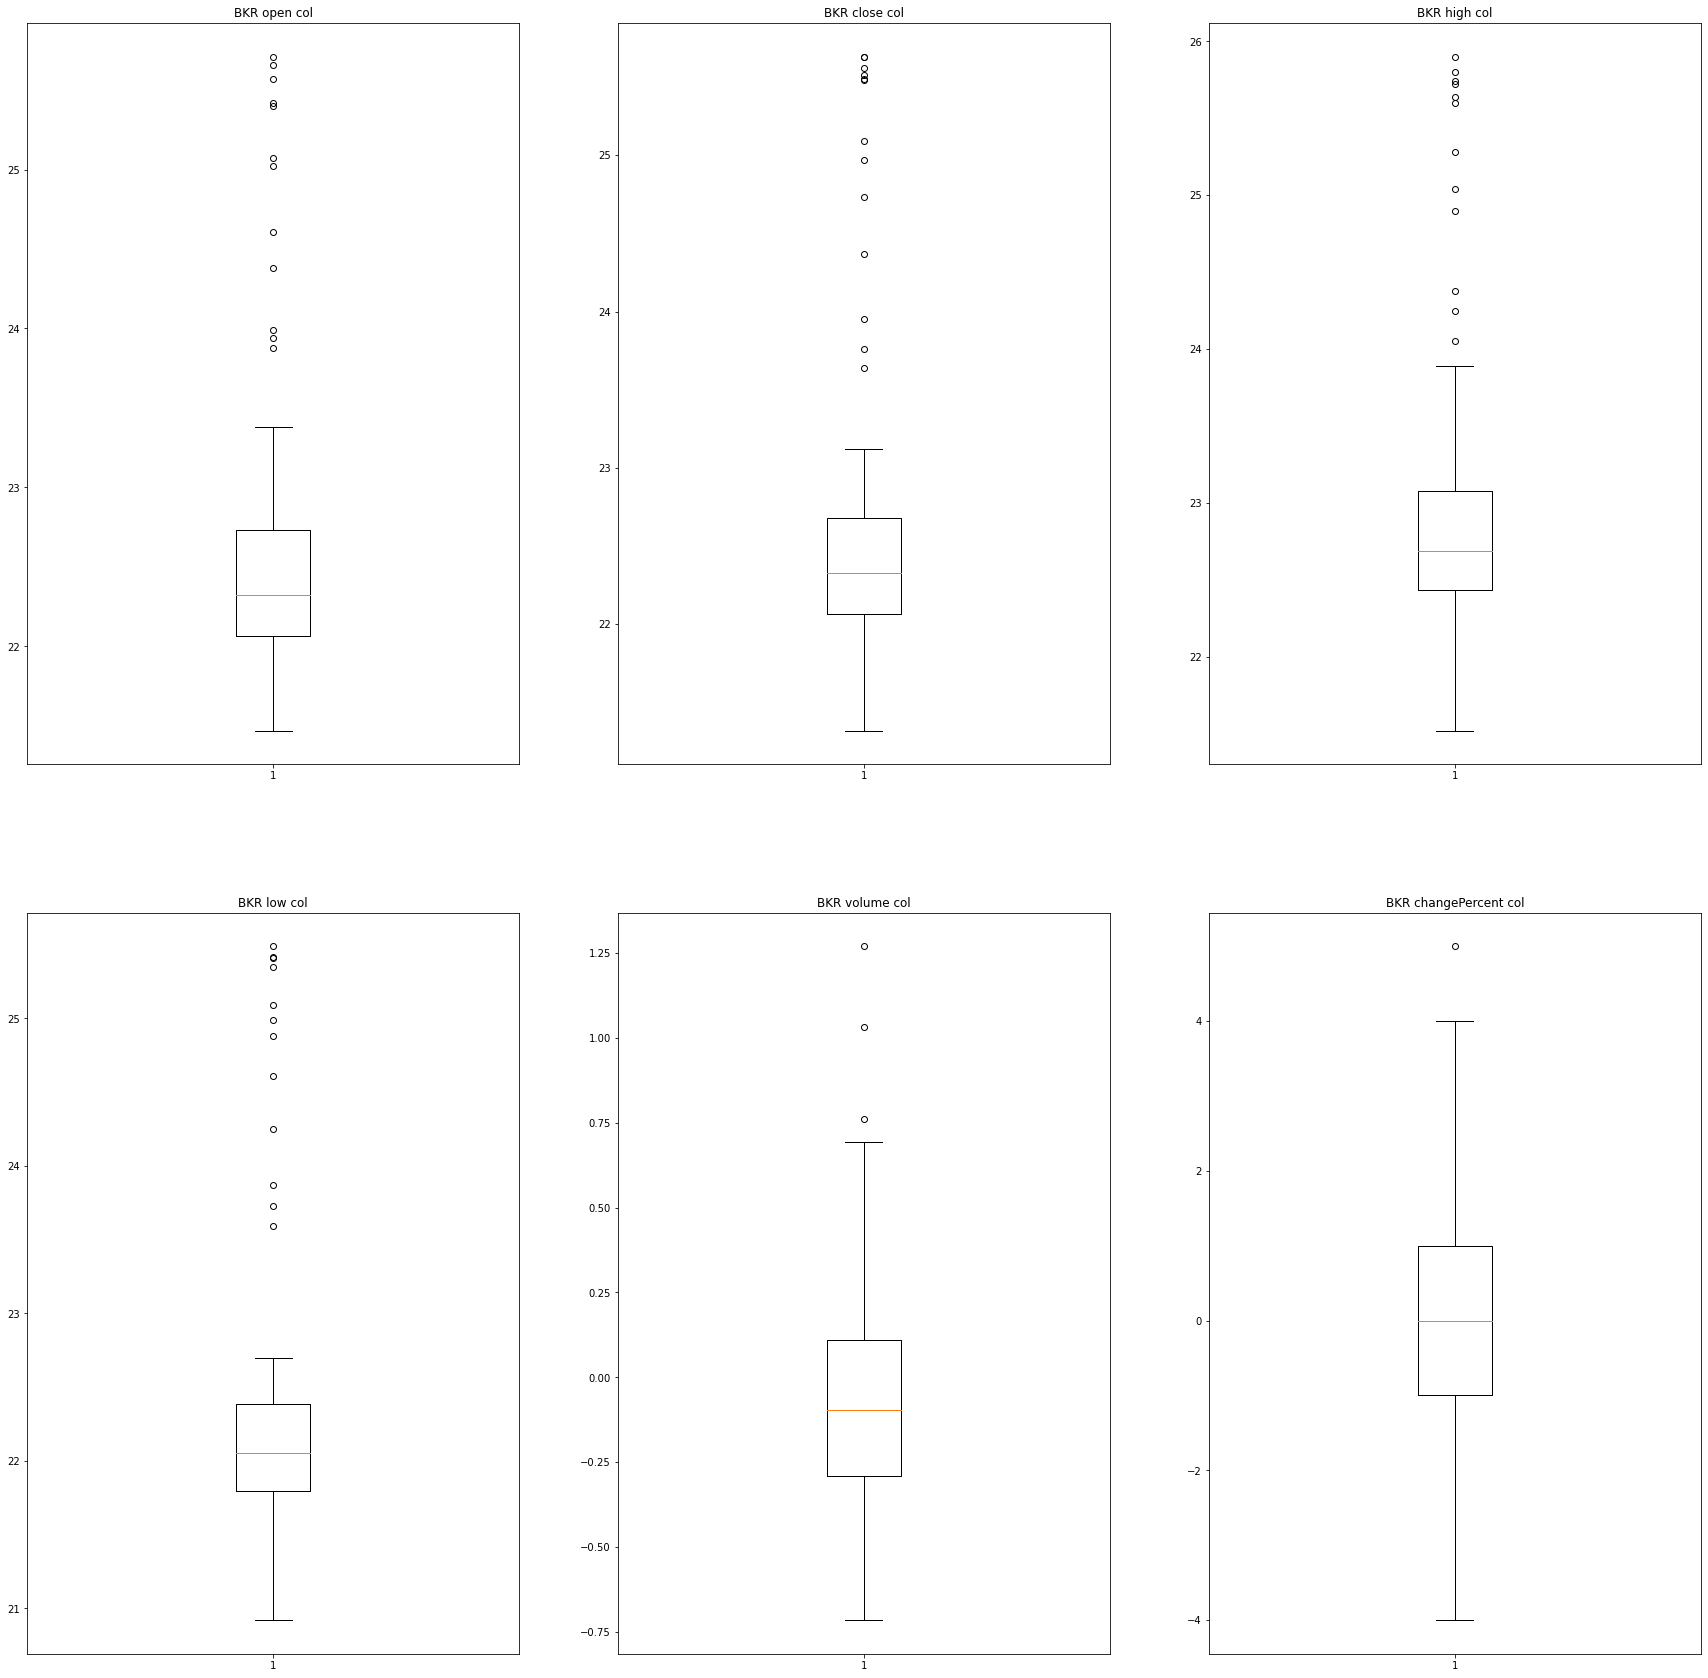

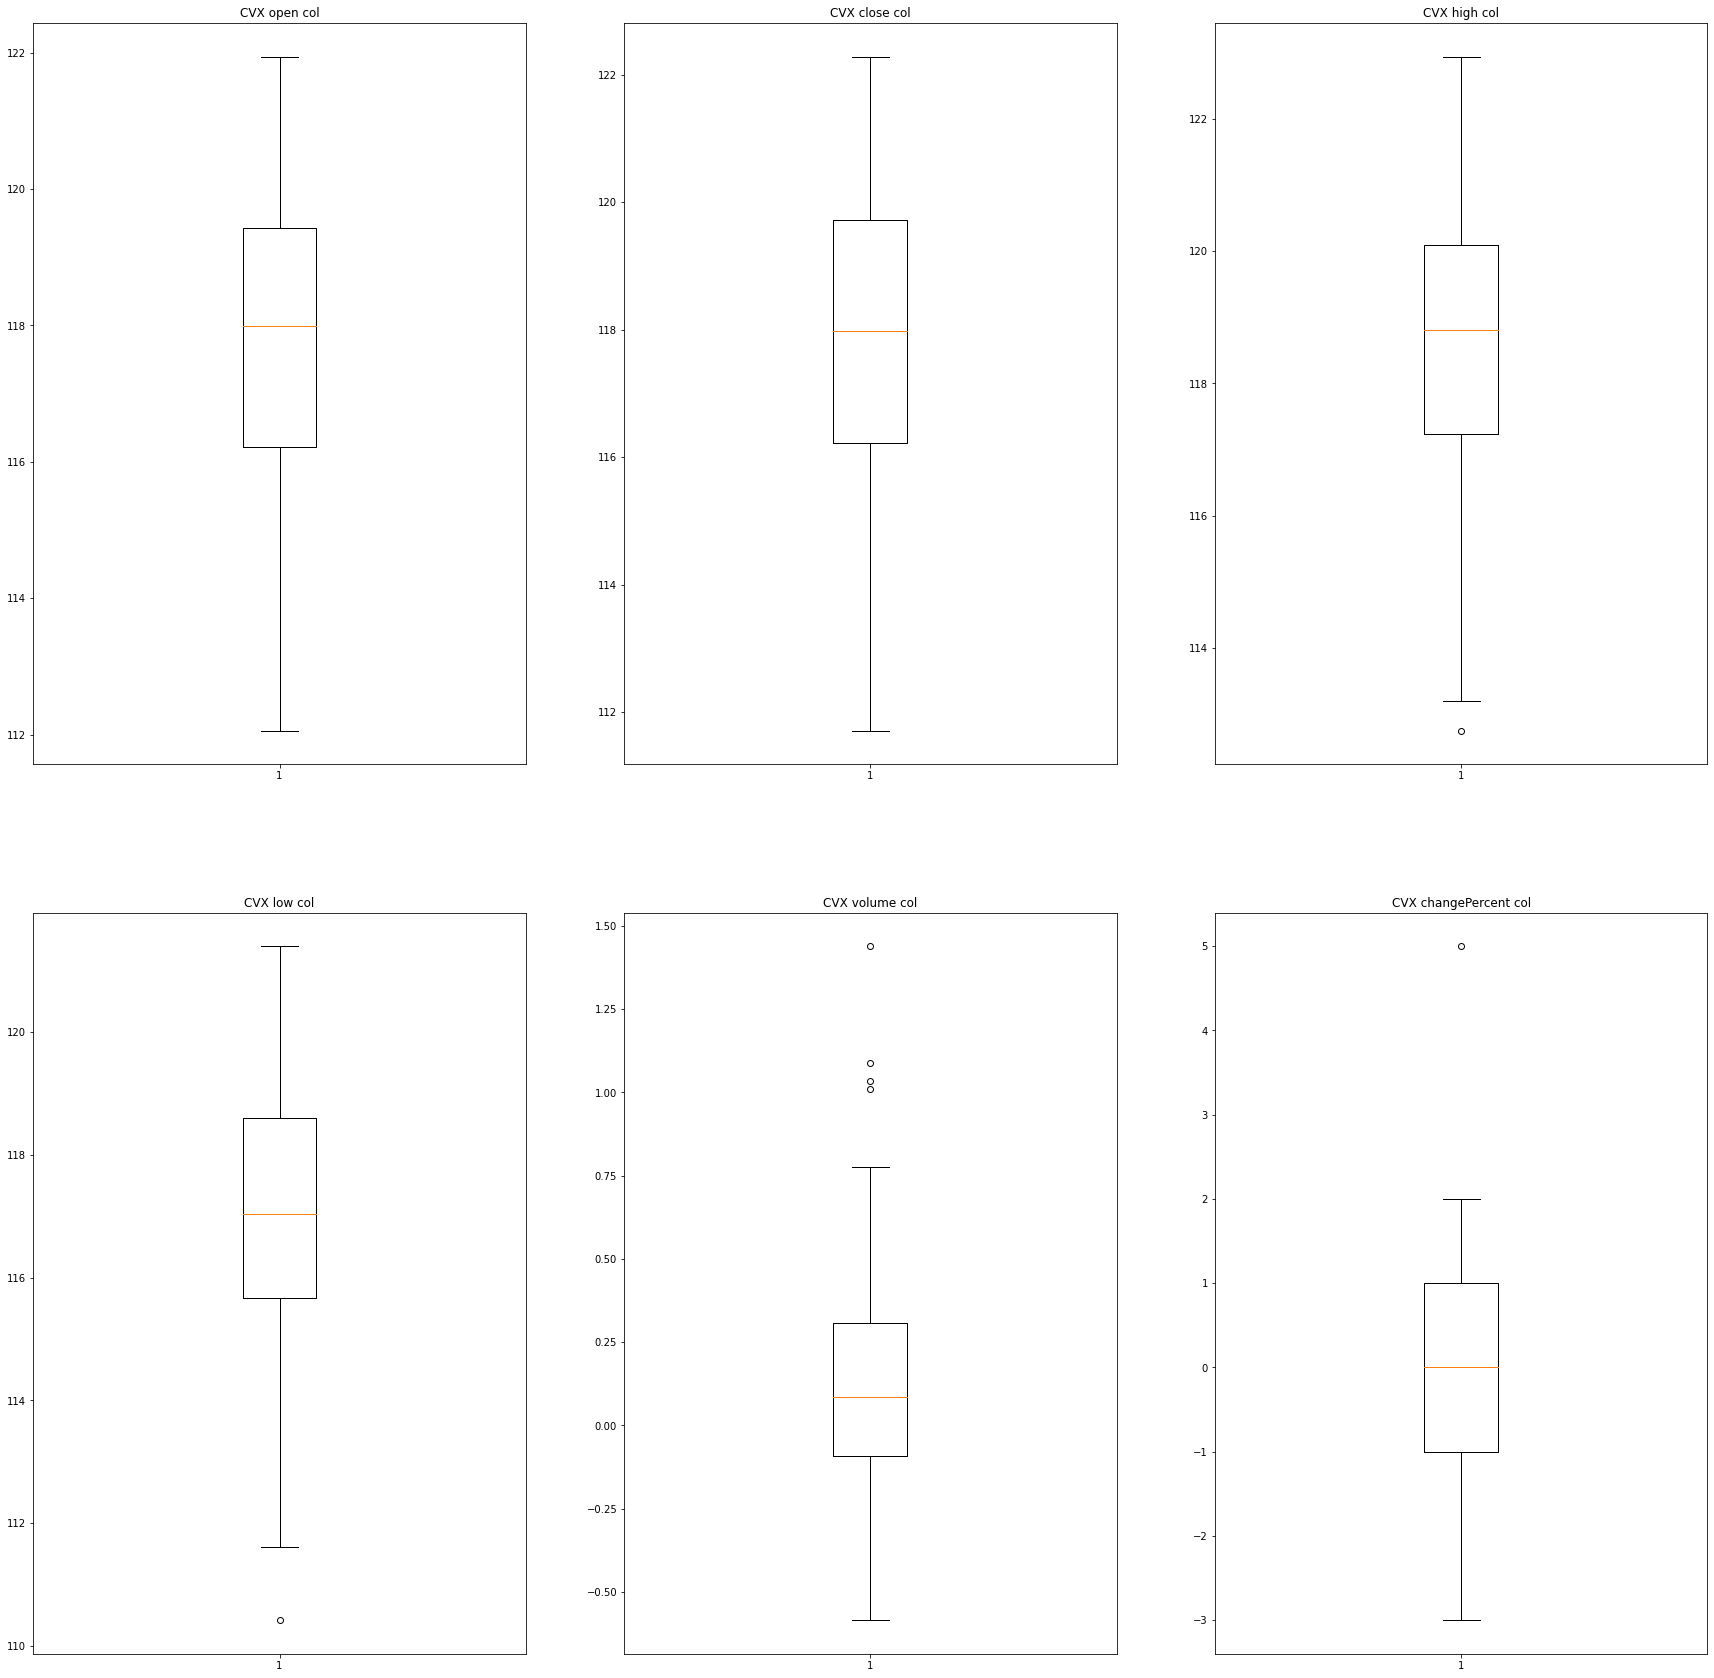

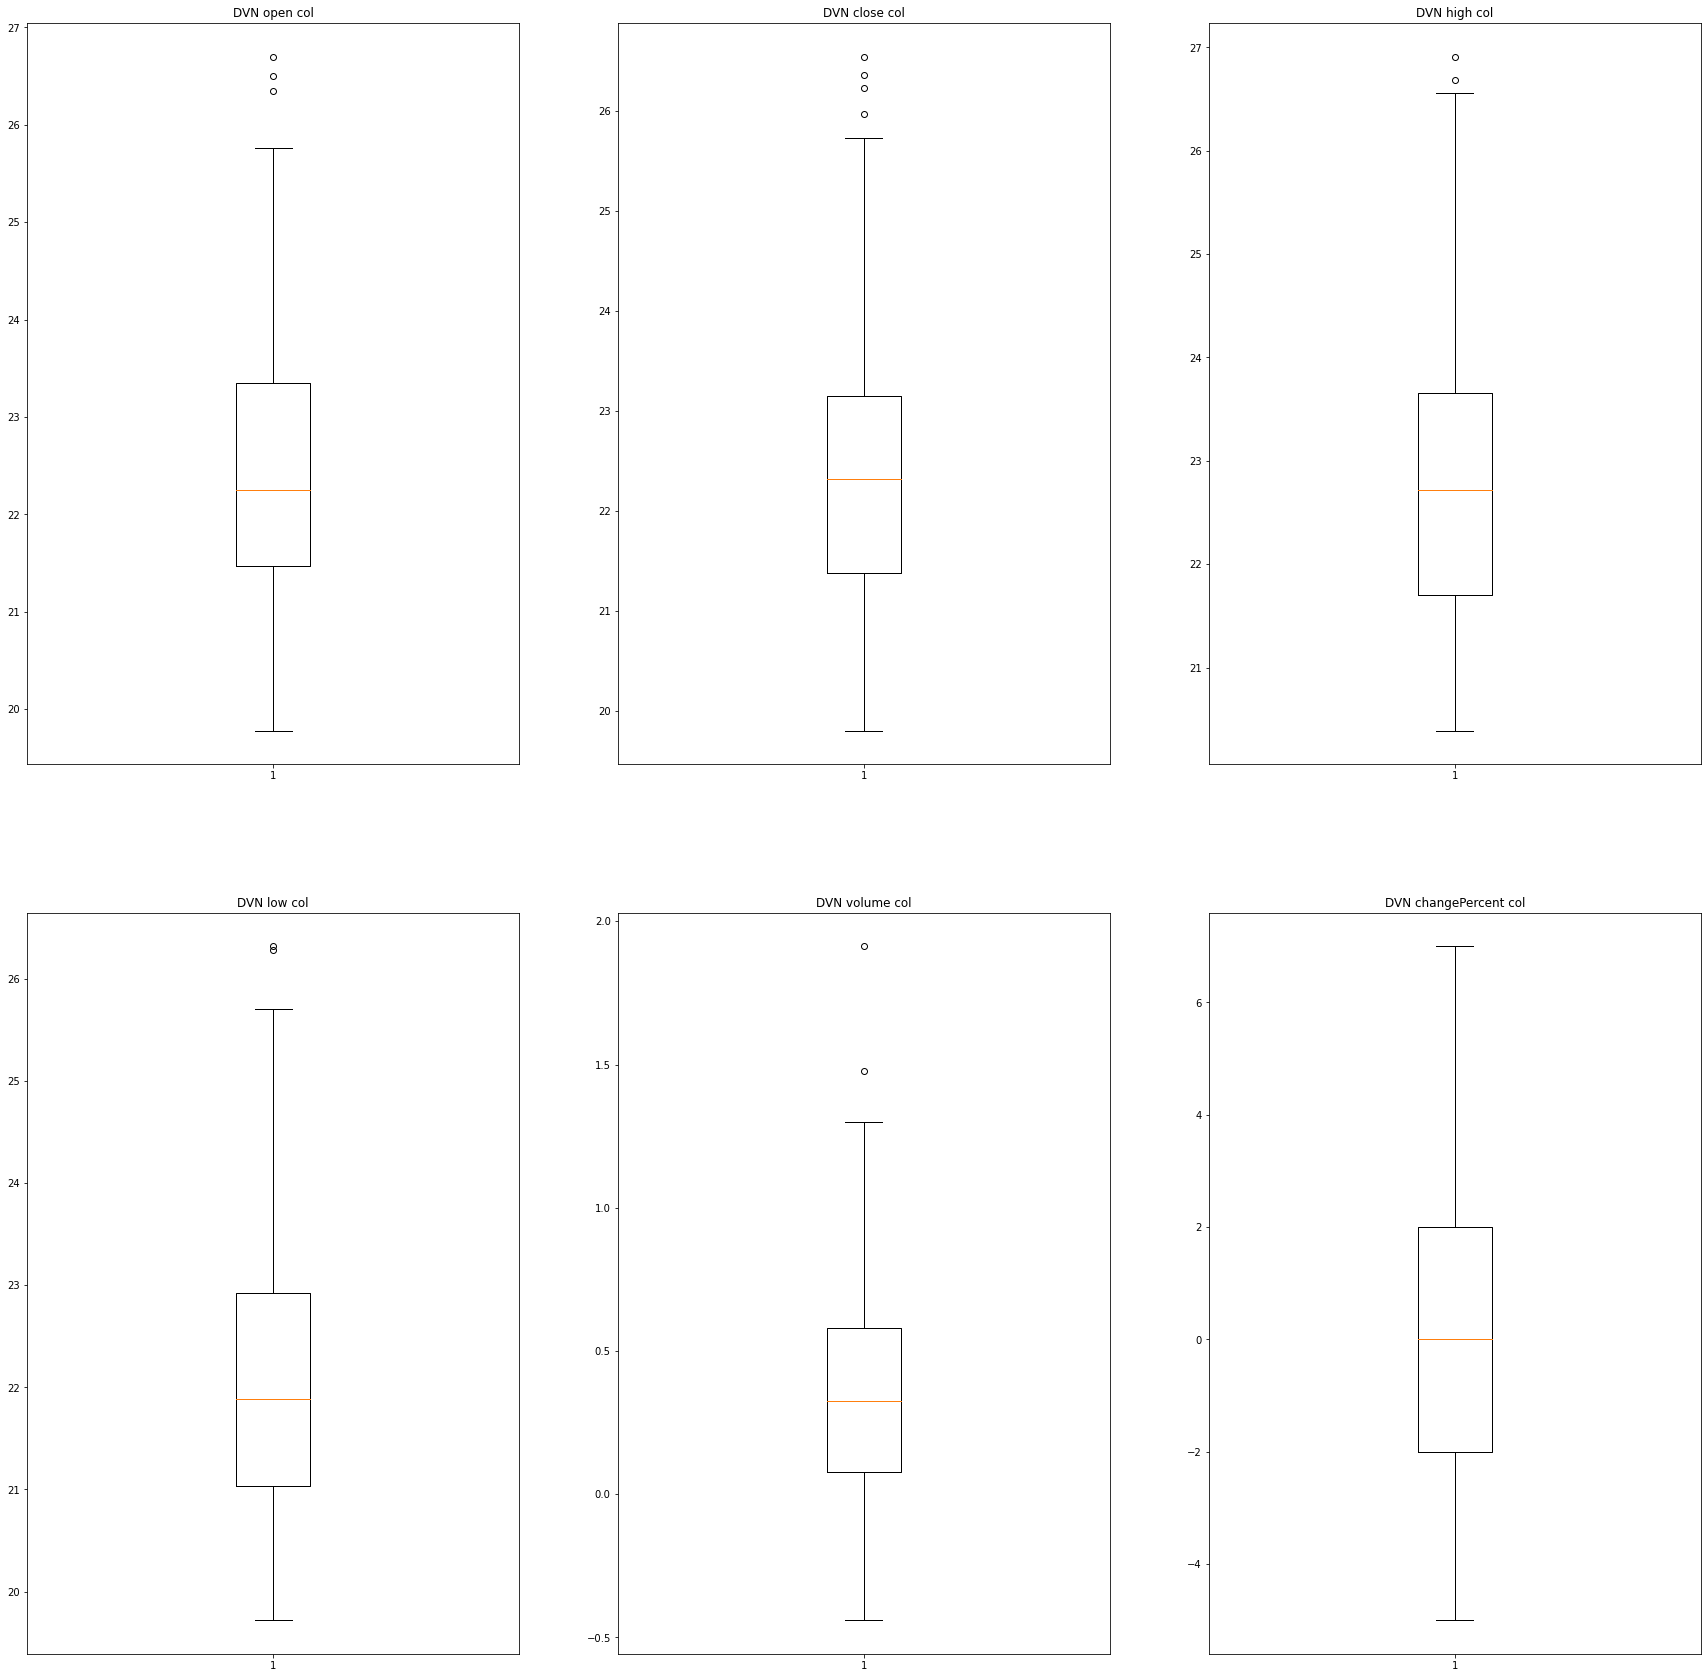

In [41]:
# for symbol in my_stocks:
#     cols_list=[]
#     for feature in numeric_list:
#         col=data_scaled[data["symbol"]==symbol][feature]
#         cols_list.append(col)
#         outliers= [feature for stat in boxplot_stats(col) for feature in stat['fliers']]
# #         tmp_outliers="no Of feature ("+feature+") = " + str(len(outliers))+" = "
#     figure=plt.figure(figsize=(15,11))
#     figure_ax= figure.add_axes([0,0,1,1])
#     figure_ax.set_title(symbol)
#     figure_ax.boxplot(cols_list)
#     plt.show()
data['volume']=data_scaled['volume']
for symbol in my_stocks:
    outlier_(data , symbol)

In [42]:
np.round(data_scaled.describe(),1)

,volume
count,640.0
mean,0.2
std,1.0
min,-0.9
25%,-0.5
50%,0.0
75%,0.5
max,7.3


### Findings and conclusions - Which feature was normalised and why? Which technique was used and why?
 - I used Robust technique
 - The only feature I have chosen to be normalized is 'volume', beacause of the huge difference between it and the remaining features, and also it has the most outliers.
 -The reason behind using robust technique is its ability to handle the outliers. 

## Bonus - Dashboard

### Average closing price per week

In [43]:
def week_close(stock):
    
    data[data["symbol"]==stock].groupby('weeks_number')['close'].mean().plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel(f'avg closing price for {stock}')
    plt.show()

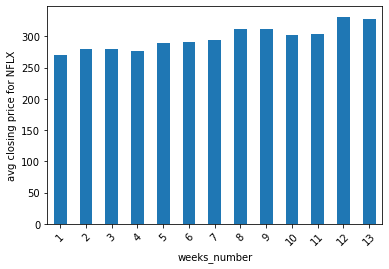

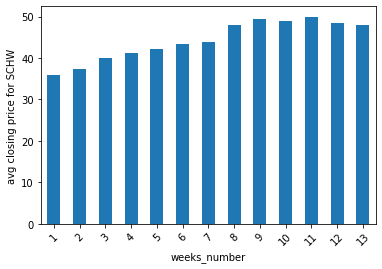

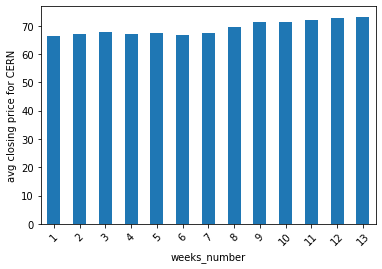

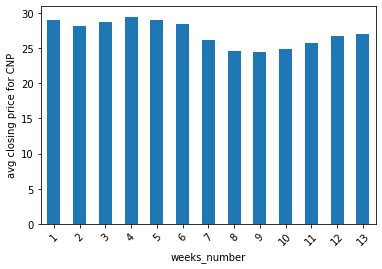

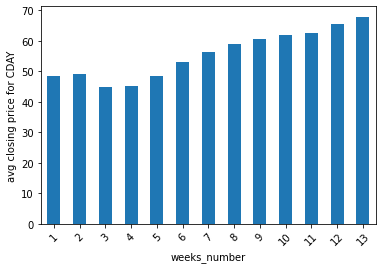

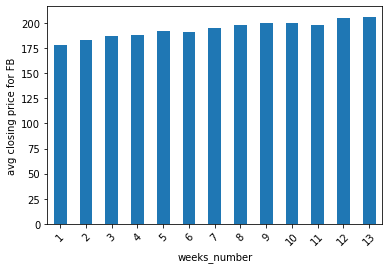

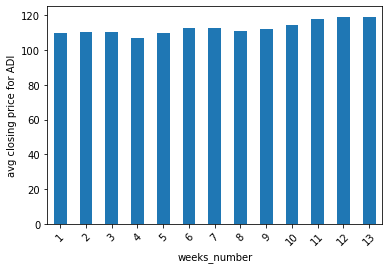

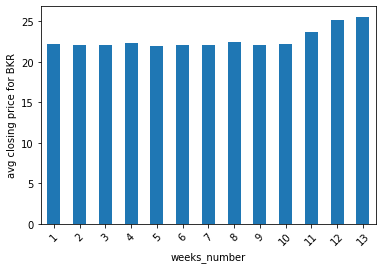

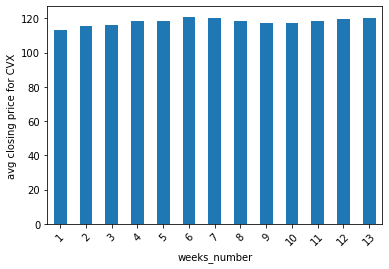

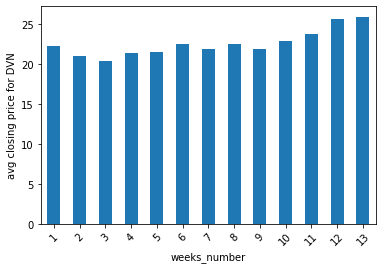

In [44]:

for stock in my_stocks:
    week_close(stock)

### Average change per week

In [45]:
def week_change(stock):
    
    data[data["symbol"]==stock].groupby('weeks_number')['changePercent'].mean().plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel(f'avg changePercent {stock}')
    plt.show()

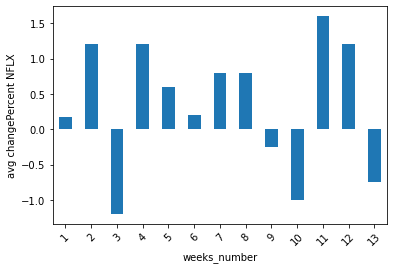

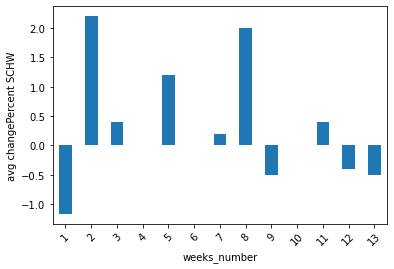

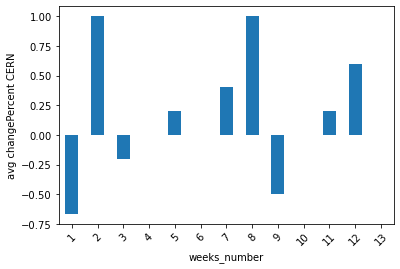

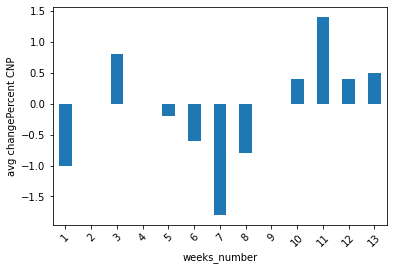

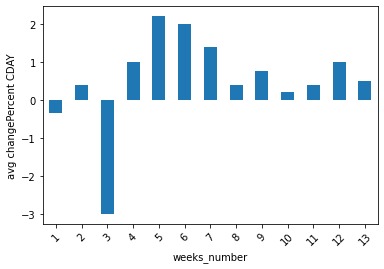

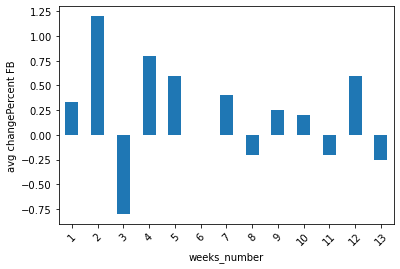

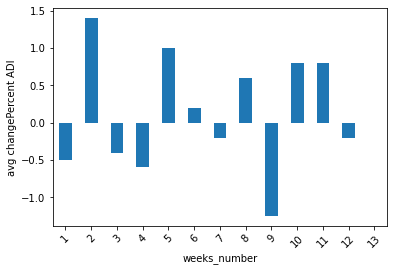

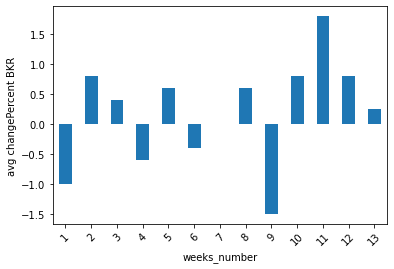

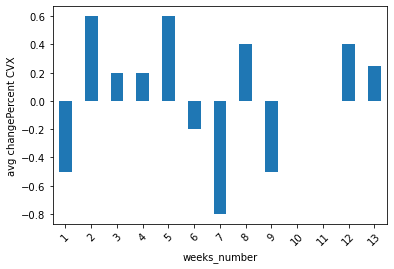

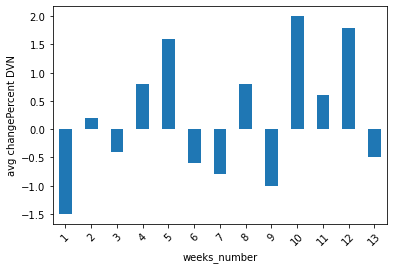

In [46]:
for stock in my_stocks:
    week_change(stock)

### Average volume per week

In [47]:
def week_volume(stock):
    
    data[data["symbol"]==stock].groupby('weeks_number')['volume'].mean().plot.bar()
    plt.xticks(rotation=45)
    plt.ylabel(f'avg volume {stock}')
    plt.show()

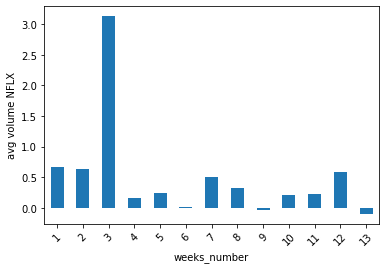

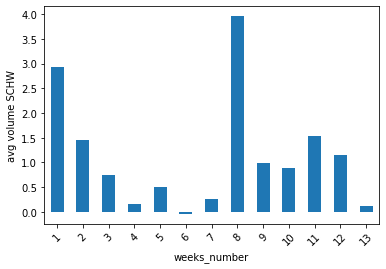

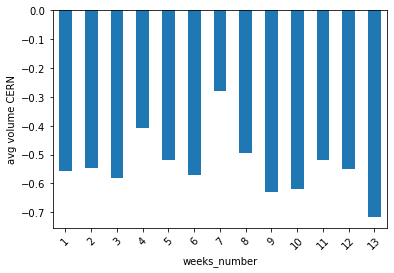

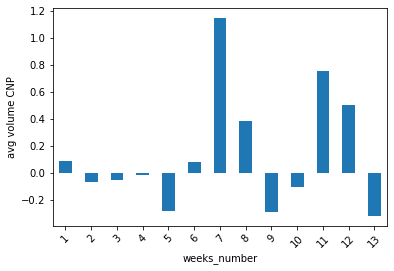

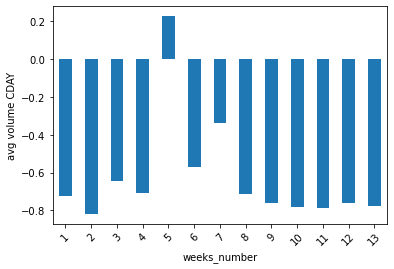

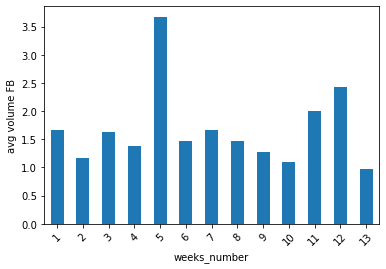

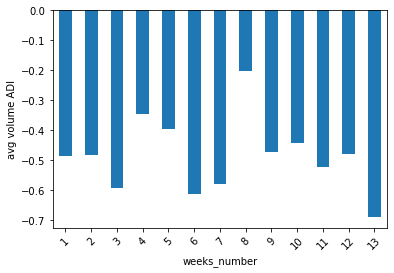

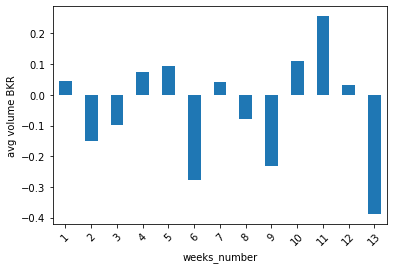

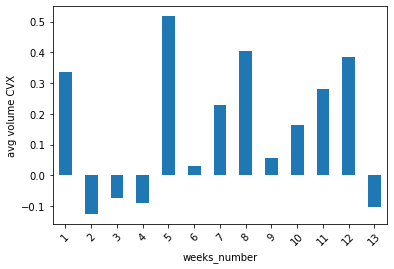

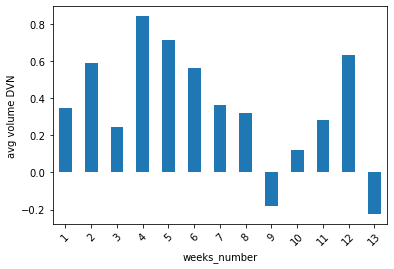

In [48]:
for stock in my_stocks:
    week_volume(stock)

### Average closing price per week of each stock

In [49]:
def same_graph_stock():
    av_list=[]
    for symbol in my_stocks:
        av=data[data["symbol"]==symbol].groupby('weeks_number')['close'].mean()
        av_list.append(av)
    for avg in av_list:
        plt.hist(avg, bins=20, alpha=0.5, label="data1")
    plt.legend(loc='upper right',labels=my_stocks)
    plt.show()

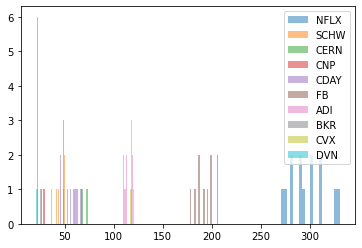

In [50]:
same_graph_stock()

### Average closing price of each sector

In [51]:

def same_graph_sector():
    data.groupby('sector')['close'].mean().plot.bar()
    plt.ylabel('avg close price')
    plt.show()

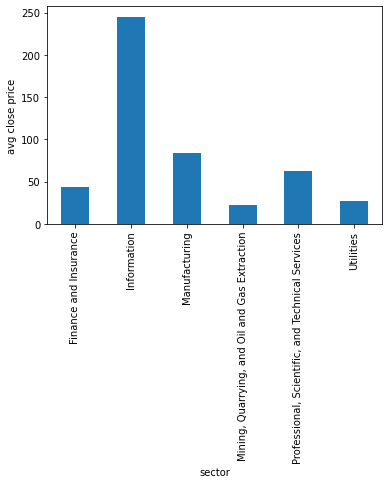

In [52]:
same_graph_sector()

## =========================================================================
## ---------------------------------------------------ABDELMAKSOUD---------------------------------------------------
## =========================================================================